Generating Binary Classification Data
Dataset shape: X=(100, 2), y=(100, 1)
Class 0 examples: 50
Class 1 examples: 50


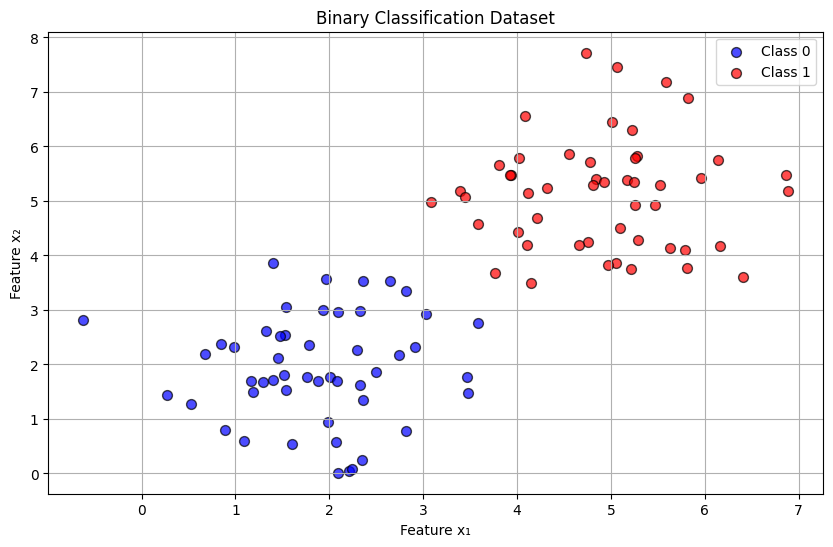


Data generated! Blue = Class 0, Red = Class 1


In [22]:
# ============================================================
# LOGISTIC REGRESSION - BINARY CLASSIFICATION
# ============================================================
# Unlike Linear Regression (predicts continuous values like prices),
# Logistic Regression predicts CATEGORIES (like yes/no, spam/not spam).
# 
# We'll create fake data with 2 groups (Class 0 and Class 1) and
# later train a model to tell them apart!
# ============================================================

# ------------------------------------------------------------
# STEP 1: IMPORT LIBRARIES
# ------------------------------------------------------------
import numpy as np                # NumPy: for math operations on arrays
import matplotlib.pyplot as plt   # Matplotlib: for creating graphs/plots
                                  # NOTE: We import matplotlib.pyplot (not just matplotlib)
                                  # because pyplot contains the plotting functions we need

# ------------------------------------------------------------
# STEP 2: SET RANDOM SEED
# ------------------------------------------------------------
# Random seed makes our "random" numbers predictable/reproducible.
# Every time we run this code, we'll get the SAME random numbers.
# This is important so you can reproduce the same results!
# Try changing 42 to any other number - you'll get different data.
np.random.seed(42)

print("=" * 60)  # Print a line of 60 "=" characters (just for decoration)
print("Generating Binary Classification Data")
print("=" * 60)

# ------------------------------------------------------------
# STEP 3: SET UP DATA PARAMETERS
# ------------------------------------------------------------
m = 100  # Total number of examples (data points) we want to create
         # We'll make 50 for Class 0 and 50 for Class 1

# ------------------------------------------------------------
# STEP 4: GENERATE CLASS 0 DATA
# ------------------------------------------------------------
# Class 0 will be a cluster of points centered around coordinates (2, 2)

# np.random.randn(m//2, 2) does the following:
#   - m//2 = 100//2 = 50 (integer division, we want 50 points)
#   - Creates a 50x2 array of random numbers from a "normal distribution"
#   - Normal distribution: most values are near 0, some spread out (-2 to +2 typically)
#   - Each row is one data point with 2 features (x₁ and x₂)
#
# + np.array([2, 2]) shifts all points so they're centered at (2, 2)
#   - Without this, points would be centered at (0, 0)
x_class0 = np.random.randn(m//2, 2) + np.array([2, 2])

# Create labels for Class 0
# np.zeros((m//2, 1)) creates an array of 50 zeros, shaped as a column (50 rows, 1 column)
# These are the "answers" - every point in x_class0 belongs to Class 0
y_class0 = np.zeros((m//2, 1))  # Label = 0 for all Class 0 points

# ------------------------------------------------------------
# STEP 5: GENERATE CLASS 1 DATA
# ------------------------------------------------------------
# Class 1 will be a cluster of points centered around coordinates (5, 5)
# Same process as Class 0, but shifted to (5, 5) instead of (2, 2)
x_class1 = np.random.randn(m//2, 2) + np.array([5, 5])

# Create labels for Class 1
# np.ones((m//2, 1)) creates an array of 50 ones
# These points belong to Class 1, so their label = 1
y_class1 = np.ones((m//2, 1))  # Label = 1 for all Class 1 points

# ------------------------------------------------------------
# STEP 6: COMBINE THE DATA
# ------------------------------------------------------------
# np.vstack = "vertical stack" - stacks arrays on top of each other
# 
# Before:  x_class0 is shape (50, 2)  - 50 points, 2 features each
#          x_class1 is shape (50, 2)  - 50 points, 2 features each
#
# After:   X is shape (100, 2) - 100 points total, 2 features each
#
#          ┌─────────────┐
#          │  x_class0   │  <- First 50 rows (Class 0 points)
#          │   (50x2)    │
#          ├─────────────┤
#          │  x_class1   │  <- Next 50 rows (Class 1 points)
#          │   (50x2)    │
#          └─────────────┘
#               X (100x2)
X = np.vstack([x_class0, x_class1])  # Stack the feature data

# Same for labels: stack the 0s on top of the 1s
# y becomes shape (100, 1) - 100 labels total
y = np.vstack([y_class0, y_class1])  # Stack the labels

# ------------------------------------------------------------
# STEP 7: SHUFFLE THE DATA
# ------------------------------------------------------------
# Right now, the first 50 points are all Class 0, and the last 50 are Class 1.
# This is bad for training! We want the data mixed up randomly.
#
# np.random.permutation(m) creates a random ordering of numbers 0-99
# Example: [42, 7, 91, 3, ...] - a shuffled list of indices
indices = np.random.permutation(m)

# Use these shuffled indices to reorder both X and y
# X[indices] picks rows from X in the order specified by indices
# This shuffles the data while keeping X and y matched up!
# (Point 42's features still match point 42's label)
X = X[indices]  # Shuffle the features
y = y[indices]  # Shuffle the labels (same order, so they still match!)

# ------------------------------------------------------------
# STEP 8: PRINT DATA SUMMARY
# ------------------------------------------------------------
# f-strings (f"...") let us insert variables directly into text
# {X.shape} becomes (100, 2), {y.shape} becomes (100, 1)
print(f"Dataset shape: X={X.shape}, y={y.shape}")

# np.sum(y == 0) counts how many labels equal 0
# y == 0 creates an array of True/False values
# np.sum() counts the Trues (True = 1, False = 0)
print(f"Class 0 examples: {np.sum(y == 0)}")  # Should be 50
print(f"Class 1 examples: {np.sum(y == 1)}")  # Should be 50

# ------------------------------------------------------------
# STEP 9: VISUALIZE THE DATA
# ------------------------------------------------------------
# Create a new figure (the window/canvas for our plot)
# figsize=(10, 6) means 10 inches wide, 6 inches tall
plt.figure(figsize=(10, 6))

# Plot Class 0 points (blue dots)
# X[y.flatten() == 0, 0] - this is fancy indexing:
#   - y.flatten() converts y from shape (100,1) to (100,) - a 1D array
#   - y.flatten() == 0 creates a True/False array (True where label is 0)
#   - X[..., 0] selects the first column (x₁ feature) of matching rows
#   - X[..., 1] selects the second column (x₂ feature) of matching rows
# So we're plotting x₁ vs x₂ for all Class 0 points
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1],  # x and y coordinates
            c='blue',           # Color of the dots
            s=50,               # Size of the dots (in points²)
            alpha=0.7,          # Transparency (0=invisible, 1=solid)
            edgecolors='black', # Black border around each dot
            linewidth=1,        # Border thickness
            label='Class 0')    # Label for the legend

# Plot Class 1 points (red dots) - same process, but for Class 1
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], 
            c='red', s=50, alpha=0.7, edgecolors='black', 
            linewidth=1, label='Class 1')

# Add labels and formatting
plt.xlabel('Feature x₁')        # Label for x-axis
plt.ylabel('Feature x₂')        # Label for y-axis
plt.title('Binary Classification Dataset')  # Title at the top
plt.legend()                    # Show the legend (explains blue=Class 0, red=Class 1)
plt.grid(True)                  # Add a grid for easier reading
plt.show()                      # Display the plot!

print("\nData generated! Blue = Class 0, Red = Class 1")

# ============================================================
# WHAT WE CREATED:
# ============================================================
# X = Features matrix (100 points × 2 features)
#     Each row is one data point with coordinates (x₁, x₂)
#
# y = Labels vector (100 × 1)
#     Each value is 0 or 1, telling us which class that point belongs to
#
# The two classes are separated in space:
#   - Class 0: clustered around (2, 2) - bottom-left area
#   - Class 1: clustered around (5, 5) - top-right area
#
# GOAL of Logistic Regression: Learn to draw a line (decision boundary)
# that separates the blue dots from the red dots!
# ============================================================


Implementing Sigmoid Function
Testing sigmoid function:

z      | σ(z)
--------------------
  -5.0 | 0.006693
  -2.0 | 0.119203
   0.0 | 0.500000
   2.0 | 0.880797
   5.0 | 0.993307


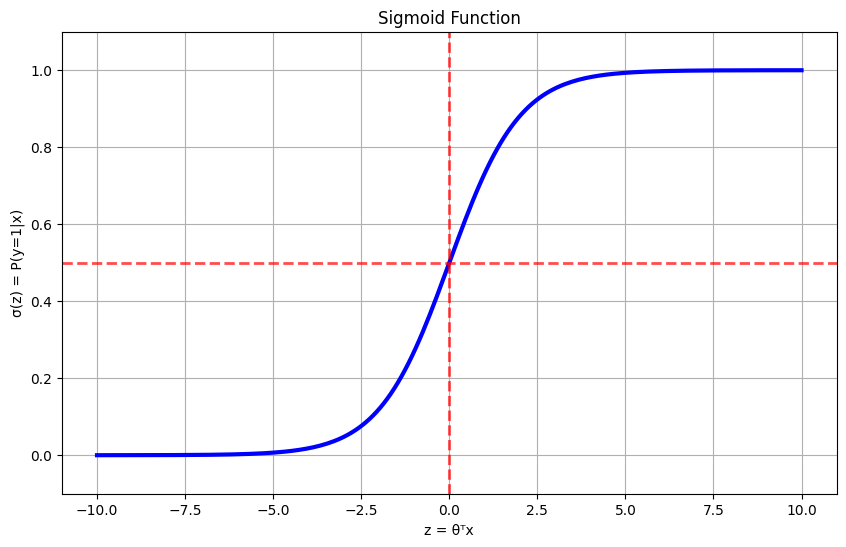


✓ Sigmoid function implemented and verified!


In [23]:
# ============================================================
# THE SIGMOID FUNCTION - The Heart of Logistic Regression
# ============================================================
# In Linear Regression, we predict any number: -∞ to +∞
# But for classification, we need PROBABILITIES: 0 to 1
#
# The sigmoid function "squashes" any number into the range (0, 1)
# This lets us interpret the output as: "probability of being Class 1"
#
# If sigmoid outputs 0.8 → 80% chance it's Class 1
# If sigmoid outputs 0.2 → 20% chance it's Class 1 (so 80% chance it's Class 0)
# ============================================================

print("\n" + "=" * 60)
print("Implementing Sigmoid Function")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: DEFINE THE SIGMOID FUNCTION
# ------------------------------------------------------------
def sigmoid(z):
    """
    Sigmoid (logistic) function - this is why it's called "Logistic" Regression!
    
    THE FORMULA:
    ┌─────────────────────────┐
    │   σ(z) = 1 / (1 + e^-z) │
    └─────────────────────────┘
    
    WHERE:
    - z = the input (can be any number from -∞ to +∞)
    - e = Euler's number ≈ 2.71828 (a special math constant)
    - σ(z) = the output (always between 0 and 1)
    
    HOW IT WORKS:
    - When z is very NEGATIVE (like -10): e^-(-10) = e^10 = huge number
      → 1/(1 + huge) ≈ 0 (close to 0)
    
    - When z is ZERO: e^0 = 1
      → 1/(1 + 1) = 0.5 (exactly in the middle!)
    
    - When z is very POSITIVE (like +10): e^-10 ≈ 0.00005 (tiny number)
      → 1/(1 + tiny) ≈ 1 (close to 1)
    
    Args:
        z: Input value (can be a single number, array, or matrix)
           In logistic regression: z = θᵀx (dot product of parameters and features)
    
    Returns:
        Output between 0 and 1 (interpreted as probability)
    """
    # np.exp(-z) calculates e^(-z) for each element
    # This works on single numbers OR entire arrays at once!
    return 1 / (1 + np.exp(-z))

# ------------------------------------------------------------
# STEP 2: TEST THE SIGMOID FUNCTION
# ------------------------------------------------------------
# Let's verify it works correctly with some test values
# We'll check negative, zero, and positive numbers

# Create an array of test values
test_values = np.array([-5, -2, 0, 2, 5])

# Pass all test values through sigmoid at once
# NumPy applies the function to each element automatically!
sigmoid_outputs = sigmoid(test_values)

# Print a nice table showing input → output
print("Testing sigmoid function:")
print("\nz      | σ(z)")       # Column headers
print("-" * 20)                # Separator line

# zip() pairs up corresponding elements from both arrays
# So we get (-5, 0.006...), (-2, 0.119...), (0, 0.5), etc.
for z_val, sig_val in zip(test_values, sigmoid_outputs):
    # f"{z_val:6.1f}" formats the number: 6 characters wide, 1 decimal place
    # f"{sig_val:.6f}" formats with 6 decimal places
    print(f"{z_val:6.1f} | {sig_val:.6f}")

# EXPECTED OUTPUT:
#   z = -5  → σ(z) ≈ 0.007  (very close to 0, definitely Class 0)
#   z = -2  → σ(z) ≈ 0.119  (low probability, likely Class 0)
#   z =  0  → σ(z) = 0.500  (exactly 50/50, right on the decision boundary!)
#   z =  2  → σ(z) ≈ 0.881  (high probability, likely Class 1)
#   z =  5  → σ(z) ≈ 0.993  (very close to 1, definitely Class 1)

# ------------------------------------------------------------
# STEP 3: VISUALIZE THE SIGMOID CURVE
# ------------------------------------------------------------
# Let's plot the sigmoid function to see its characteristic "S" shape

# np.linspace(-10, 10, 200) creates 200 evenly-spaced points from -10 to 10
# This gives us a smooth curve when we plot
z_range = np.linspace(-10, 10, 200)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the sigmoid curve
# z_range = x-axis values (inputs)
# sigmoid(z_range) = y-axis values (outputs)
plt.plot(z_range, sigmoid(z_range), 
         linewidth=3,       # Thick line so it's easy to see
         color='blue')      # Blue color

# Add reference lines to show the decision boundary
# plt.axhline draws a HORIZONTAL line across the entire plot
plt.axhline(y=0.5,              # At y = 0.5 (the decision threshold)
            color='red',         # Red color
            linestyle='--',      # Dashed line
            linewidth=2, 
            alpha=0.7)           # Slightly transparent

# plt.axvline draws a VERTICAL line across the entire plot
plt.axvline(x=0,                # At x = 0 (where sigmoid = 0.5)
            color='red', 
            linestyle='--', 
            linewidth=2, 
            alpha=0.7)

# Add labels
plt.xlabel('z = θᵀx')                    # x-axis: the input to sigmoid
plt.ylabel('σ(z) = P(y=1|x)')            # y-axis: probability of Class 1
plt.title('Sigmoid Function')             # Title
plt.grid(True)                            # Add grid lines
plt.ylim(-0.1, 1.1)                       # Set y-axis limits (show a bit beyond 0-1)
plt.show()                                # Display the plot!

print("\n✓ Sigmoid function implemented and verified!")

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Sigmoid transforms ANY number into a probability (0 to 1)
#
# 2. The "S" shape (sigmoid = "S-shaped" in Latin):
#    - Flat near 0 for very negative inputs
#    - Steep transition around z = 0
#    - Flat near 1 for very positive inputs
#
# 3. Decision boundary at z = 0:
#    - If z > 0 → σ(z) > 0.5 → Predict Class 1
#    - If z < 0 → σ(z) < 0.5 → Predict Class 0
#    - If z = 0 → σ(z) = 0.5 → Right on the boundary!
#
# 4. In Logistic Regression:
#    - z = θ₀ + θ₁x₁ + θ₂x₂ + ... (linear combination)
#    - We pass z through sigmoid to get probability
#    - P(y=1|x) = σ(θᵀx)
#
# 5. WHY sigmoid is perfect for classification:
#    - Outputs are always valid probabilities (0-1)
#    - Smooth and differentiable (needed for gradient descent)
#    - Natural interpretation: confidence increases as z moves away from 0
# ============================================================

In [24]:
# ============================================================
# THE CROSS-ENTROPY COST FUNCTION
# ============================================================
# In Linear Regression, we used MSE (Mean Squared Error) as our cost.
# But for Logistic Regression, MSE doesn't work well!
#
# WHY NOT MSE?
# - MSE with sigmoid creates a "bumpy" surface with many local minima
# - Gradient descent could get stuck in a bad spot
#
# SOLUTION: Cross-Entropy (also called "Log Loss")
# - Creates a smooth, "bowl-shaped" surface (convex)
# - Gradient descent always finds the global minimum!
# - Also has nice mathematical properties for optimization
# ============================================================

print("\n" + "=" * 60)
print("Implementing Cross-Entropy Cost Function")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: DEFINE THE COST FUNCTION
# ------------------------------------------------------------
def compute_cost(X, y, theta):
    """
    Compute binary cross-entropy cost (log loss)
    
    THE FORMULA:
    ┌─────────────────────────────────────────────────────────┐
    │  J(θ) = -(1/m) Σ [ y·log(ŷ) + (1-y)·log(1-ŷ) ]         │
    └─────────────────────────────────────────────────────────┘
    
    WHERE:
    - m = number of training examples
    - y = actual label (0 or 1)
    - ŷ = predicted probability = σ(θᵀx)
    - Σ = sum over all m examples
    
    HOW IT WORKS (the clever part!):
    The formula has TWO parts: y·log(ŷ) and (1-y)·log(1-ŷ)
    
    When y = 1 (actual is Class 1):
        - First part: 1·log(ŷ) = log(ŷ)  ← this is active
        - Second part: (1-1)·log(1-ŷ) = 0  ← this disappears!
        - Cost = -log(ŷ)
        - If ŷ close to 1: -log(1) = 0 (good prediction, low cost!)
        - If ŷ close to 0: -log(0) = ∞ (terrible prediction, huge cost!)
    
    When y = 0 (actual is Class 0):
        - First part: 0·log(ŷ) = 0  ← this disappears!
        - Second part: (1-0)·log(1-ŷ) = log(1-ŷ)  ← this is active
        - Cost = -log(1-ŷ)
        - If ŷ close to 0: -log(1) = 0 (good prediction, low cost!)
        - If ŷ close to 1: -log(0) = ∞ (terrible prediction, huge cost!)
    
    Args:
        X: Feature matrix with bias column (m × n)
           Each row is one example, each column is a feature
        y: Target vector (m × 1)
           Actual labels (0 or 1) for each example
        theta: Parameters (n × 1)
           The weights we're trying to learn
    
    Returns:
        cost: A single number representing how wrong our predictions are
              Lower is better! 0 = perfect predictions
    """
    
    # Get the number of training examples
    # len(y) counts the rows in y
    m = len(y)
    
    # ------------------------------------------------------------
    # STEP 1a: MAKE PREDICTIONS
    # ------------------------------------------------------------
    # X.dot(theta) = matrix multiplication = θᵀx for all examples at once
    # This gives us z values (the input to sigmoid)
    # sigmoid() converts z to probabilities (0 to 1)
    predictions = sigmoid(X.dot(theta))  # Shape: (m, 1) - one probability per example
    
    # ------------------------------------------------------------
    # STEP 1b: HANDLE EDGE CASES (Numerical Stability)
    # ------------------------------------------------------------
    # Problem: log(0) = -infinity, which breaks our calculation!
    # This can happen if predictions are exactly 0 or exactly 1
    #
    # Solution: "Clip" predictions to be between a tiny number and almost 1
    # epsilon = 1e-10 = 0.0000000001 (a very small number)
    epsilon = 1e-10
    
    # np.clip(array, min, max) limits values to be within [min, max]
    # Predictions below epsilon become epsilon
    # Predictions above (1-epsilon) become (1-epsilon)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    
    # ------------------------------------------------------------
    # STEP 1c: CALCULATE CROSS-ENTROPY COST
    # ------------------------------------------------------------
    # Breaking down the formula:
    # - y * np.log(predictions)         = y·log(ŷ) for all examples
    # - (1-y) * np.log(1-predictions)   = (1-y)·log(1-ŷ) for all examples
    # - np.sum(...)                     = add them all up (Σ)
    # - -(1/m) * ...                    = average and negate
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1-y) * np.log(1-predictions))
    
    return cost

# ------------------------------------------------------------
# STEP 2: TEST THE COST FUNCTION
# ------------------------------------------------------------
# Let's verify our cost function works by testing it

# First, we need to add a bias column to X
# np.c_[] concatenates columns together
# np.ones((m, 1)) creates a column of 1s (the bias term)
# Result: X goes from shape (100, 2) to (100, 3)
#
#    Original X          Bias column        X with bias (X_b)
#   ┌─────────────┐     ┌─────┐           ┌─────────────────┐
#   │ x₁    x₂    │  +  │  1  │     =     │  1   x₁    x₂   │
#   │ 2.1   3.4   │     │  1  │           │  1   2.1   3.4  │
#   │ 5.2   4.8   │     │  1  │           │  1   5.2   4.8  │
#   │ ...   ...   │     │ ... │           │  1   ...   ...  │
#   └─────────────┘     └─────┘           └─────────────────┘
#      (100×2)           (100×1)              (100×3)
X_b = np.c_[np.ones((m, 1)), X]  # X_b = "X with bias"

# Create random initial theta values (3 parameters: θ₀, θ₁, θ₂)
# np.random.randn(3, 1) creates 3 random numbers in a column
# These are our starting guesses for the parameters
theta_test = np.random.randn(3, 1)

# Calculate the cost with these random parameters
# This should be relatively high since we haven't trained yet
initial_cost = compute_cost(X_b, y, theta_test)
print(f"Cost with random theta: {initial_cost:.4f}")

# ------------------------------------------------------------
# STEP 3: VISUALIZE HOW COST PENALIZES WRONG PREDICTIONS
# ------------------------------------------------------------
# Let's see how the cost function punishes different predictions
# This helps understand WHY cross-entropy works so well!

print("\nHow cost changes with predictions:")
print("\nActual y | Predicted ŷ | Cost contribution")
print("-" * 45)

# Test for both classes
for actual_y in [0, 1]:
    print(f"\nWhen actual y = {actual_y}:")
    
    # Test different prediction values
    for pred in [0.01, 0.1, 0.5, 0.9, 0.99]:
        # Calculate cost for this single prediction
        if actual_y == 1:
            # When y=1, cost = -log(ŷ)
            # We WANT ŷ close to 1
            cost = -np.log(pred)
        else:
            # When y=0, cost = -log(1-ŷ)
            # We WANT ŷ close to 0
            cost = -np.log(1 - pred)
        
        # Show if this is a good or bad prediction
        if actual_y == 1:
            quality = "GOOD!" if pred > 0.5 else "BAD!"
        else:
            quality = "GOOD!" if pred < 0.5 else "BAD!"
        
        print(f"    ŷ = {pred:.2f}  →  cost = {cost:.4f}  {quality}")

print("\n✓ Cost function implemented!")
print("\nNotice: Wrong confident predictions have HUGE cost!")
print("  - Predicting 0.01 when y=1: cost = 4.6 (very high!)")
print("  - Predicting 0.99 when y=1: cost = 0.01 (very low!)")

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Cross-entropy heavily penalizes CONFIDENT WRONG predictions
#    - Predicting 0.99 when actual is 0 → huge cost!
#    - Predicting 0.01 when actual is 1 → huge cost!
#
# 2. Cost is low when predictions match actual labels
#    - Predicting 0.99 when actual is 1 → tiny cost
#    - Predicting 0.01 when actual is 0 → tiny cost
#
# 3. The formula cleverly "switches" based on y:
#    - y=1 activates: -log(ŷ)
#    - y=0 activates: -log(1-ŷ)
#
# 4. We use epsilon clipping to avoid log(0) = -infinity
#
# 5. Cross-entropy is CONVEX (bowl-shaped), so gradient descent
#    will always find the best solution!
# ============================================================


Implementing Cross-Entropy Cost Function
Cost with random theta: 1.6629

How cost changes with predictions:

Actual y | Predicted ŷ | Cost contribution
---------------------------------------------

When actual y = 0:
    ŷ = 0.01  →  cost = 0.0101  GOOD!
    ŷ = 0.10  →  cost = 0.1054  GOOD!
    ŷ = 0.50  →  cost = 0.6931  BAD!
    ŷ = 0.90  →  cost = 2.3026  BAD!
    ŷ = 0.99  →  cost = 4.6052  BAD!

When actual y = 1:
    ŷ = 0.01  →  cost = 4.6052  BAD!
    ŷ = 0.10  →  cost = 2.3026  BAD!
    ŷ = 0.50  →  cost = 0.6931  BAD!
    ŷ = 0.90  →  cost = 0.1054  GOOD!
    ŷ = 0.99  →  cost = 0.0101  GOOD!

✓ Cost function implemented!

Notice: Wrong confident predictions have HUGE cost!
  - Predicting 0.01 when y=1: cost = 4.6 (very high!)
  - Predicting 0.99 when y=1: cost = 0.01 (very low!)



Implementing Gradient Descent
Starting Gradient Descent...
Initial cost: 3.937450

Iteration    0: Cost = 2.700324
Iteration  100: Cost = 0.331229
Iteration  200: Cost = 0.250945
Iteration  300: Cost = 0.205488
Iteration  400: Cost = 0.175900
Iteration  500: Cost = 0.155020
Iteration  600: Cost = 0.139436
Iteration  700: Cost = 0.127314
Iteration  800: Cost = 0.117583
Iteration  900: Cost = 0.109576

Final cost: 0.102915

Optimal parameters:
  θ₀ (bias)   = -6.0155
  θ₁ (weight) = 0.9890
  θ₂ (weight) = 0.8476


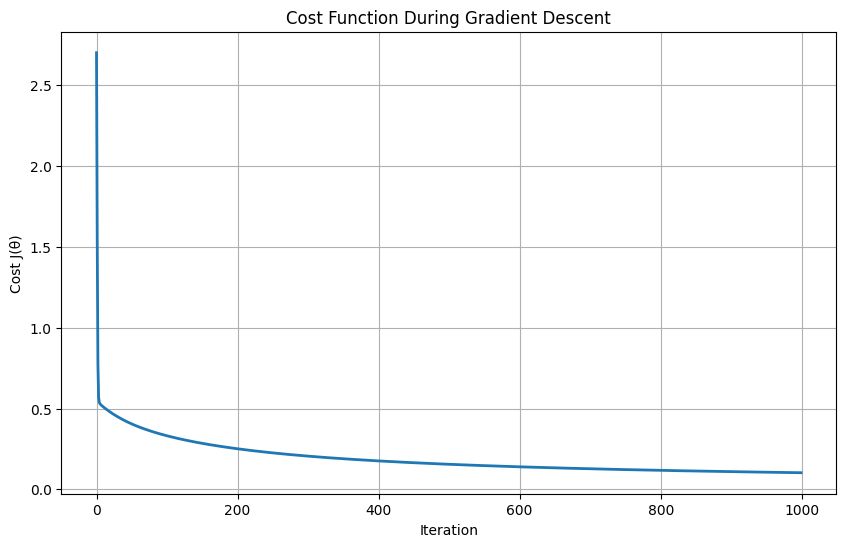


✓ Gradient descent complete!


In [25]:
# ============================================================
# GRADIENT DESCENT FOR LOGISTIC REGRESSION
# ============================================================
# Now we have:
#   1. Sigmoid function - to make predictions (probabilities)
#   2. Cost function - to measure how wrong we are
#
# Next we need: A way to LEARN the best parameters (θ)!
#
# GRADIENT DESCENT is an optimization algorithm that:
#   - Starts with random θ values
#   - Repeatedly adjusts θ to reduce the cost
#   - Eventually finds the θ that minimizes cost
#
# Think of it like walking downhill in fog:
#   - You can't see the bottom (the best θ)
#   - But you CAN feel the slope under your feet (the gradient)
#   - Just keep walking downhill, and you'll reach the bottom!
# ============================================================

print("\n" + "=" * 60)
print("Implementing Gradient Descent")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: DEFINE THE GRADIENT DESCENT FUNCTION
# ------------------------------------------------------------
def gradient_descent_logistic(X, y, theta, learning_rate, n_iterations, verbose=True):
    """
    Perform gradient descent for logistic regression
    
    THE UPDATE RULE:
    ┌─────────────────────────────────────────────────┐
    │  θ := θ - α · (1/m) · Xᵀ(σ(Xθ) - y)            │
    └─────────────────────────────────────────────────┘
    
    BREAKING IT DOWN:
    - θ := θ - ...     → Update theta (subtract something from it)
    - α                → Learning rate (how big of a step to take)
    - (1/m)            → Average over all examples
    - Xᵀ               → Transpose of X (flip rows and columns)
    - σ(Xθ)            → Our predictions (sigmoid of X times theta)
    - σ(Xθ) - y        → Errors (how far off our predictions are)
    - Xᵀ(σ(Xθ) - y)    → Gradient (direction of steepest increase)
    
    THE MATH (simplified):
    The gradient tells us: "If I increase θ a tiny bit, how much 
    does the cost change?" 
    
    - If gradient is POSITIVE → increasing θ increases cost
      → So we should DECREASE θ (subtract)
    
    - If gradient is NEGATIVE → increasing θ decreases cost  
      → Subtracting a negative = adding, so θ increases
    
    This always moves θ in the direction that REDUCES cost!
    
    Args:
        X: Feature matrix with bias column (m × n)
           m = number of examples, n = number of features + 1
        y: Target vector (m × 1)
           The actual labels (0 or 1)
        theta: Initial parameters (n × 1)
           Our starting guess (usually random)
        learning_rate: Step size α (a small positive number like 0.1)
           - Too small: learning is slow
           - Too large: might overshoot and never converge
        n_iterations: How many times to update θ
           More iterations = more time to learn
        verbose: If True, print progress every 100 iterations
    
    Returns:
        theta: The optimized parameters (what we learned!)
        cost_history: List of cost values at each iteration
                      (useful for checking if learning worked)
    """
    
    # Get the number of training examples
    m = len(y)
    
    # Create an empty list to store the cost at each iteration
    # We'll use this later to plot how the cost decreases over time
    cost_history = []
    
    # ------------------------------------------------------------
    # THE MAIN LEARNING LOOP
    # ------------------------------------------------------------
    # Repeat the update process n_iterations times
    # Each iteration, theta gets a little bit better!
    for iteration in range(n_iterations):
        
        # --------------------------------------------------------
        # STEP 1a: MAKE PREDICTIONS WITH CURRENT THETA
        # --------------------------------------------------------
        # X.dot(theta) = matrix multiplication
        # For each example: z = θ₀·1 + θ₁·x₁ + θ₂·x₂
        # sigmoid() converts z to probability (0 to 1)
        predictions = sigmoid(X.dot(theta))  # Shape: (m, 1)
        
        # --------------------------------------------------------
        # STEP 1b: CALCULATE ERRORS
        # --------------------------------------------------------
        # Error = prediction - actual
        # If we predicted 0.8 but actual is 1: error = -0.2 (too low)
        # If we predicted 0.8 but actual is 0: error = +0.8 (too high)
        errors = predictions - y  # Shape: (m, 1)
        
        # --------------------------------------------------------
        # STEP 1c: CALCULATE THE GRADIENT
        # --------------------------------------------------------
        # Gradient = (1/m) * Xᵀ · errors
        #
        # X.T = transpose of X (rows become columns, columns become rows)
        # Original X shape: (100, 3)  →  X.T shape: (3, 100)
        #
        # X.T.dot(errors) does matrix multiplication:
        #   (3, 100) × (100, 1) = (3, 1)
        #
        # Result: One gradient value for each parameter (θ₀, θ₁, θ₂)
        # This tells us how to adjust each parameter!
        gradient = (1/m) * X.T.dot(errors)  # Shape: (3, 1)
        
        # --------------------------------------------------------
        # STEP 1d: UPDATE THETA (THE ACTUAL LEARNING STEP!)
        # --------------------------------------------------------
        # θ = θ - learning_rate * gradient
        #
        # We SUBTRACT because:
        # - Gradient points toward INCREASING cost
        # - We want to DECREASE cost
        # - So we go in the OPPOSITE direction
        #
        # learning_rate controls the step size:
        # - Small (0.001): tiny steps, slow but stable
        # - Large (1.0): big steps, fast but might overshoot
        theta = theta - learning_rate * gradient
        
        # --------------------------------------------------------
        # STEP 1e: RECORD THE COST
        # --------------------------------------------------------
        # Calculate the cost with the new theta
        # This should decrease over time if learning is working!
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)  # Add to our list
        
        # --------------------------------------------------------
        # STEP 1f: PRINT PROGRESS (optional)
        # --------------------------------------------------------
        # Every 100 iterations, show how we're doing
        # iteration % 100 == 0 is True when iteration is 0, 100, 200, ...
        if verbose and iteration % 100 == 0:
            print(f"Iteration {iteration:4d}: Cost = {cost:.6f}")
    
    # Return the final theta and the history of costs
    return theta, cost_history

# ------------------------------------------------------------
# STEP 2: PREPARE THE DATA
# ------------------------------------------------------------
# Add the bias column (column of 1s) to X
# This allows the model to learn an intercept term (θ₀)
X_b = np.c_[np.ones((m, 1)), X]  # Shape: (100, 3)

# Initialize theta with random values
# np.random.randn(3, 1) creates 3 random numbers from normal distribution
# These are our initial guesses for θ₀, θ₁, θ₂
theta_initial = np.random.randn(3, 1)

# Set the learning rate (α)
# 0.1 is a reasonable starting point for many problems
# You might need to experiment to find the best value
learning_rate = 0.1

# Set the number of iterations
# 1000 is usually enough for simple problems
# More complex problems might need more iterations
n_iterations = 1000

# ------------------------------------------------------------
# STEP 3: RUN GRADIENT DESCENT!
# ------------------------------------------------------------
print("Starting Gradient Descent...")
print(f"Initial cost: {compute_cost(X_b, y, theta_initial):.6f}\n")

# Call our gradient descent function
# This is where the actual LEARNING happens!
# The function returns:
#   - theta_optimal: the best parameters it found
#   - cost_history: how the cost changed over time
theta_optimal, cost_history = gradient_descent_logistic(
    X_b, y, theta_initial, learning_rate, n_iterations
)

# ------------------------------------------------------------
# STEP 4: DISPLAY THE RESULTS
# ------------------------------------------------------------
print(f"\nFinal cost: {cost_history[-1]:.6f}")  # cost_history[-1] = last element

# Show the learned parameters
print(f"\nOptimal parameters:")
print(f"  θ₀ (bias)   = {theta_optimal[0][0]:.4f}")  # Intercept term
print(f"  θ₁ (weight) = {theta_optimal[1][0]:.4f}")  # Weight for feature x₁
print(f"  θ₂ (weight) = {theta_optimal[2][0]:.4f}")  # Weight for feature x₂

# ------------------------------------------------------------
# STEP 5: VISUALIZE THE LEARNING PROCESS
# ------------------------------------------------------------
# Plot how the cost changed over iterations
# A good training run shows the cost decreasing and leveling off

plt.figure(figsize=(10, 6))

# Plot the cost history
# x-axis: iteration number (0, 1, 2, ..., 999)
# y-axis: cost at that iteration
plt.plot(cost_history, linewidth=2)

plt.xlabel('Iteration')           # Label for x-axis
plt.ylabel('Cost J(θ)')           # Label for y-axis
plt.title('Cost Function During Gradient Descent')  # Title
plt.grid(True)                    # Add grid for readability
plt.show()

print("\n✓ Gradient descent complete!")

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Gradient Descent is an iterative optimization algorithm
#    - Start with random θ
#    - Repeatedly update: θ = θ - α * gradient
#    - Stop after enough iterations (or when cost stops decreasing)
#
# 2. The gradient points "uphill" (toward increasing cost)
#    - We subtract it to go "downhill" (toward decreasing cost)
#
# 3. Learning rate (α) is crucial:
#    - Too small → slow learning, might not finish
#    - Too large → unstable, might diverge (cost goes UP!)
#    - Just right → smooth decrease, converges nicely
#
# 4. The cost curve should:
#    - Start high (random θ = bad predictions)
#    - Decrease quickly at first (big improvements)
#    - Level off (approaching the minimum)
#
# 5. If cost goes UP or oscillates wildly:
#    - Learning rate is probably too large
#    - Try reducing it (e.g., 0.1 → 0.01)
#
# 6. The learned parameters (θ) define our decision boundary:
#    - θ₀ + θ₁x₁ + θ₂x₂ = 0 is the line separating classes
#    - Points where this > 0 → Class 1
#    - Points where this < 0 → Class 0
# ============================================================

In [26]:
# ============================================================
# MAKING PREDICTIONS WITH OUR TRAINED MODEL
# ============================================================
# Now that we've learned the optimal θ parameters, we can use them
# to make predictions on data!
#
# THE PREDICTION PROCESS:
# 1. Calculate z = θ₀ + θ₁x₁ + θ₂x₂ (linear combination)
# 2. Pass z through sigmoid to get probability: P(y=1|x) = σ(z)
# 3. Convert probability to class prediction:
#    - If probability ≥ 0.5 → Predict Class 1
#    - If probability < 0.5 → Predict Class 0
#
# The 0.5 threshold is called the "decision boundary" in probability space
# ============================================================

print("\n" + "=" * 60)
print("Making Predictions")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: DEFINE THE PREDICTION FUNCTION
# ------------------------------------------------------------
def predict(X, theta, threshold=0.5):
    """
    Make predictions using learned parameters
    
    THE PROCESS:
    ┌─────────────────────────────────────────────────────────┐
    │  1. z = X · θ           (linear combination)            │
    │  2. prob = σ(z)         (convert to probability 0-1)    │
    │  3. pred = prob ≥ 0.5   (convert to class 0 or 1)       │
    └─────────────────────────────────────────────────────────┘
    
    EXAMPLE:
    If θ = [-10, 1.5, 1.5] and x = [1, 5, 5]:
      z = -10 + 1.5(5) + 1.5(5) = -10 + 7.5 + 7.5 = 5
      prob = σ(5) = 0.993  (very high!)
      pred = 0.993 ≥ 0.5 → Class 1
    
    Args:
        X: Feature matrix with bias column (m × n)
           Each row is one example to predict
        theta: Learned parameters (n × 1)
           The weights we learned from training
        threshold: Decision threshold (default 0.5)
           - Higher threshold = more conservative about predicting Class 1
           - Lower threshold = more likely to predict Class 1
    
    Returns:
        probabilities: The raw probability P(y=1|x) for each example
                       Values between 0 and 1
        predictions: The final class predictions (0 or 1)
                     Based on whether probability ≥ threshold
    """
    
    # ------------------------------------------------------------
    # STEP 1a: CALCULATE PROBABILITIES
    # ------------------------------------------------------------
    # X.dot(theta) computes z = θ₀ + θ₁x₁ + θ₂x₂ for all examples
    # sigmoid() converts z to probability (0 to 1)
    # Result: One probability per example
    probabilities = sigmoid(X.dot(theta))  # Shape: (m, 1)
    
    # ------------------------------------------------------------
    # STEP 1b: CONVERT PROBABILITIES TO CLASS PREDICTIONS
    # ------------------------------------------------------------
    # (probabilities >= threshold) creates a True/False array
    #   - True where probability ≥ 0.5
    #   - False where probability < 0.5
    #
    # .astype(int) converts True/False to 1/0
    #   - True → 1 (Class 1)
    #   - False → 0 (Class 0)
    #
    # EXAMPLE:
    #   probabilities = [0.92, 0.15, 0.73, 0.08]
    #   >= 0.5        = [True, False, True, False]
    #   .astype(int)  = [1, 0, 1, 0]
    predictions = (probabilities >= threshold).astype(int)
    
    return probabilities, predictions

# ------------------------------------------------------------
# STEP 2: MAKE PREDICTIONS ON TRAINING DATA
# ------------------------------------------------------------
# Let's see how well our model does on the data it was trained on
# X_b already has the bias column from earlier

# Call our predict function
# Returns both probabilities and final predictions
y_prob, y_pred = predict(X_b, theta_optimal)

# ------------------------------------------------------------
# STEP 3: CALCULATE ACCURACY
# ------------------------------------------------------------
# Accuracy = (number of correct predictions) / (total predictions) × 100%
#
# y_pred == y creates a True/False array
#   - True where prediction matches actual label
#   - False where prediction is wrong
#
# np.mean() calculates the average:
#   - True counts as 1, False counts as 0
#   - So mean = (number of Trues) / (total) = fraction correct
#
# × 100 converts fraction to percentage
accuracy = np.mean(y_pred == y) * 100

print(f"Training accuracy: {accuracy:.2f}%")

# ------------------------------------------------------------
# STEP 4: SHOW SAMPLE PREDICTIONS
# ------------------------------------------------------------
# Let's look at individual predictions to understand what's happening

print("\nSample predictions:")
print("\nActual | Predicted | Probability")
print("-" * 40)

# Loop through the first 10 examples
for i in range(10):
    # y[i][0] gets the actual label (0 or 1)
    # y_pred[i][0] gets our prediction (0 or 1)
    # y_prob[i][0] gets the probability (0.0 to 1.0)
    #
    # int() converts to integer for cleaner display
    # :.4f formats probability to 4 decimal places
    print(f"  {int(y[i][0])}    |     {y_pred[i][0]}     |   {y_prob[i][0]:.4f}")

print("\n✓ Predictions computed!")

# ============================================================
# UNDERSTANDING THE OUTPUT:
# ============================================================
# 
# Actual | Predicted | Probability
# ----------------------------------------
#   1    |     1     |   0.9722    ← High prob (97%), correctly predicted 1
#   0    |     0     |   0.0321    ← Low prob (3%), correctly predicted 0
#   1    |     1     |   0.7759    ← Moderate-high prob (78%), correct
#   0    |     0     |   0.2550    ← Low-ish prob (26%), still < 0.5 → correct
#
# INTERPRETING PROBABILITIES:
# - Close to 1.0: Model is CONFIDENT it's Class 1
# - Close to 0.0: Model is CONFIDENT it's Class 0
# - Close to 0.5: Model is UNCERTAIN (near decision boundary)
#
# 100% accuracy on training data is good, but could indicate:
# - Our data is well-separated (easy problem) ← This is our case!
# - Or possible overfitting (model memorized data)
# - Always test on NEW data to be sure!
# ============================================================

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Prediction is a 3-step process:
#    - Linear combination: z = θᵀx
#    - Sigmoid: probability = σ(z)
#    - Threshold: class = 1 if probability ≥ 0.5, else 0
#
# 2. The threshold (0.5) can be adjusted:
#    - Higher (e.g., 0.7): Fewer Class 1 predictions, more confident
#    - Lower (e.g., 0.3): More Class 1 predictions, less strict
#    - Useful when false positives or false negatives have different costs
#
# 3. Probabilities give MORE information than predictions:
#    - 0.51 → Class 1 (barely!)
#    - 0.99 → Class 1 (very confident!)
#    - Both predict Class 1, but confidence is very different
#
# 4. Training accuracy measures how well we fit the training data
#    - 100% = perfect fit on training data
#    - But the real test is performance on NEW, unseen data!
# ============================================================


Making Predictions
Training accuracy: 100.00%

Sample predictions:

Actual | Predicted | Probability
----------------------------------------
  1    |     1     |   0.9727
  0    |     0     |   0.0312
  1    |     1     |   0.7768
  0    |     0     |   0.0486
  1    |     1     |   0.9464
  0    |     0     |   0.0715
  1    |     1     |   0.9664
  1    |     1     |   0.9365
  0    |     0     |   0.2527
  0    |     0     |   0.0117

✓ Predictions computed!



Visualizing Decision Boundary


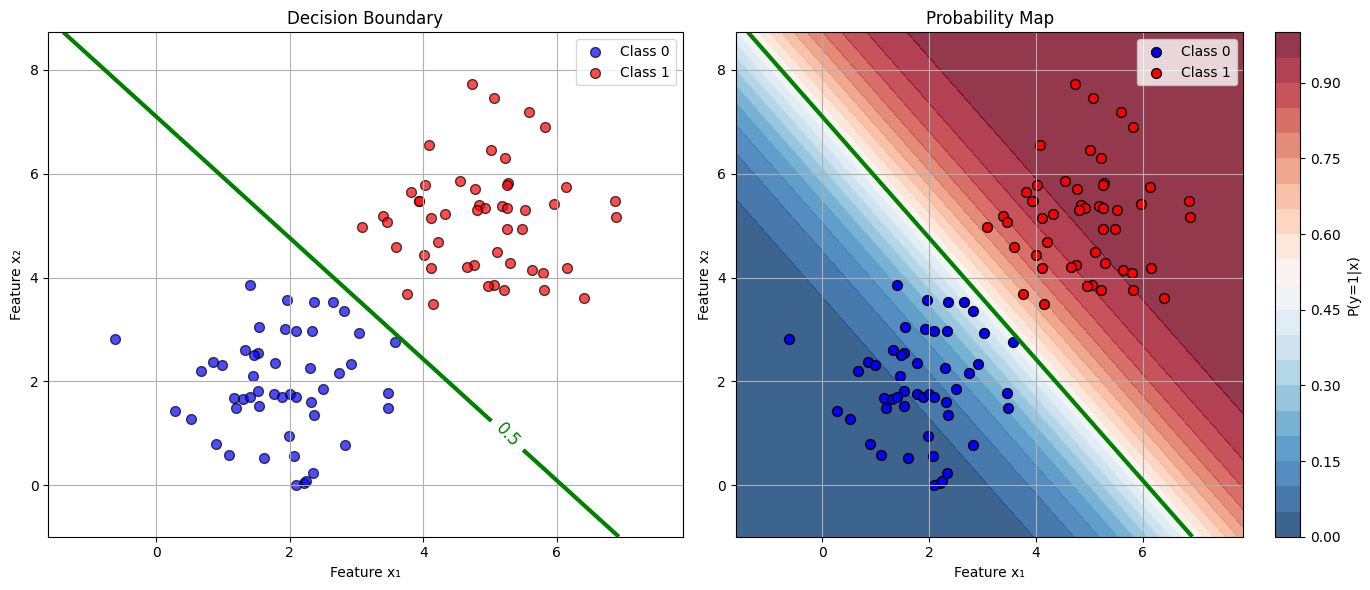


✓ Decision boundary visualized!
• Green line: Decision boundary (P = 0.5)
• Left plot: Clear separation between classes
• Right plot: Probability gradually transitions from blue to red


In [27]:
# ============================================================
# VISUALIZING THE DECISION BOUNDARY
# ============================================================
# The decision boundary is the LINE that separates Class 0 from Class 1.
# It's where the model is exactly 50% sure: P(y=1|x) = 0.5
#
# MATHEMATICALLY:
# Decision boundary is where: θ₀ + θ₁x₁ + θ₂x₂ = 0
# (because sigmoid(0) = 0.5)
#
# We can rearrange to get the line equation:
#   x₂ = -(θ₀/θ₂) - (θ₁/θ₂)x₁
#
# This is a straight line! (y = mx + b form)
# That's why it's called "LINEAR" classification.
# ============================================================

print("\n" + "=" * 60)
print("Visualizing Decision Boundary")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: DEFINE THE VISUALIZATION FUNCTION
# ------------------------------------------------------------
def plot_decision_boundary(X, y, theta):
    """
    Plot data points and decision boundary
    
    This function creates TWO visualizations:
    1. LEFT: Data points with the decision boundary line
    2. RIGHT: A "heatmap" showing probability across the entire space
    
    The heatmap helps you SEE how confident the model is in different regions:
    - Deep RED areas: Model is very sure it's Class 1
    - Deep BLUE areas: Model is very sure it's Class 0
    - WHITE/PALE areas: Model is uncertain (near 50%)
    """
    
    # ------------------------------------------------------------
    # STEP 1a: CREATE A GRID OF POINTS
    # ------------------------------------------------------------
    # To draw the decision boundary, we need to check the model's prediction
    # at MANY points across the entire plot area.
    #
    # First, find the range of our data (with some padding)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # x₁ range
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # x₂ range
    
    # np.meshgrid creates a GRID of points covering the entire plot area
    #
    # Imagine laying graph paper over our plot:
    # - np.linspace(x1_min, x1_max, 200) creates 200 evenly-spaced x₁ values
    # - np.linspace(x2_min, x2_max, 200) creates 200 evenly-spaced x₂ values
    # - meshgrid combines them to make a 200×200 grid = 40,000 points!
    #
    # VISUAL:
    #   x₂ ↑
    #      │  • • • • • • •    Each • is a grid point
    #      │  • • • • • • •    where we'll calculate
    #      │  • • • • • • •    the probability
    #      │  • • • • • • •
    #      └──────────────→ x₁
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),  # 200 x₁ values
        np.linspace(x2_min, x2_max, 200)   # 200 x₂ values
    )
    
    # ------------------------------------------------------------
    # STEP 1b: PREPARE GRID FOR PREDICTION
    # ------------------------------------------------------------
    # We need to reshape our grid into a format the model can use
    #
    # xx1.ravel() flattens the 2D grid into a 1D array of 40,000 x₁ values
    # xx2.ravel() flattens the 2D grid into a 1D array of 40,000 x₂ values
    #
    # np.c_[] combines them with a bias column:
    #   [1, x₁, x₂] for each of the 40,000 points
    X_grid = np.c_[
        np.ones(xx1.ravel().shape[0]),  # Bias column (40,000 ones)
        xx1.ravel(),                      # All x₁ values
        xx2.ravel()                       # All x₂ values
    ]  # Shape: (40000, 3)
    
    # ------------------------------------------------------------
    # STEP 1c: CALCULATE PROBABILITY AT EACH GRID POINT
    # ------------------------------------------------------------
    # Use our trained model to get P(y=1|x) for all 40,000 points
    Z = sigmoid(X_grid.dot(theta))  # Shape: (40000, 1)
    
    # Reshape back to 2D grid shape (200×200) for plotting
    # This is needed for contour plots
    Z = Z.reshape(xx1.shape)  # Shape: (200, 200)
    
    # ------------------------------------------------------------
    # STEP 2: CREATE THE PLOTS
    # ------------------------------------------------------------
    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(14, 6))  # 14 inches wide, 6 inches tall
    
    # ============================================================
    # LEFT PLOT: Decision Boundary
    # ============================================================
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is plot #1 (left)
    
    # Plot Class 0 points (blue)
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1],
                c='blue', s=50, alpha=0.7, edgecolors='black',
                linewidth=1, label='Class 0')
    
    # Plot Class 1 points (red)
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1],
                c='red', s=50, alpha=0.7, edgecolors='black',
                linewidth=1, label='Class 1')
    
    # Draw the decision boundary line
    # plt.contour draws lines where Z equals specific values
    # levels=[0.5] means: draw a line where probability = 0.5
    # This is THE decision boundary!
    contour = plt.contour(xx1, xx2, Z,     # Grid coordinates and probabilities
                          levels=[0.5],     # Draw line at P = 0.5
                          linewidths=3,     # Thick line
                          colors='green')   # Green color
    
    # Add a label "0.5" on the contour line
    plt.clabel(contour, inline=True, fontsize=12)
    
    plt.xlabel('Feature x₁')
    plt.ylabel('Feature x₂')
    plt.title('Decision Boundary')
    plt.legend()
    plt.grid(True)
    
    # ============================================================
    # RIGHT PLOT: Probability Heatmap
    # ============================================================
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is plot #2 (right)
    
    # plt.contourf creates a FILLED contour plot (heatmap)
    # - levels=20: Use 20 different color levels for smooth gradient
    # - cmap='RdBu_r': Red-Blue colormap (reversed)
    #   - Red = high probability (Class 1)
    #   - Blue = low probability (Class 0)
    #   - White = 0.5 (uncertain)
    plt.contourf(xx1, xx2, Z,        # Grid coordinates and probabilities
                 levels=20,           # 20 color levels for smooth gradient
                 cmap='RdBu_r',       # Red-Blue colormap
                 alpha=0.8)           # Slightly transparent
    
    # Add a colorbar to show what colors mean
    plt.colorbar(label='P(y=1|x)')  # Label explains it's probability of Class 1
    
    # Plot the data points on top of the heatmap
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1],
                c='blue', s=50, alpha=1, edgecolors='black',
                linewidth=1, label='Class 0')
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1],
                c='red', s=50, alpha=1, edgecolors='black',
                linewidth=1, label='Class 1')
    
    # Draw decision boundary on heatmap too
    plt.contour(xx1, xx2, Z, levels=[0.5], linewidths=3, colors='green')
    
    plt.xlabel('Feature x₁')
    plt.ylabel('Feature x₂')
    plt.title('Probability Map')
    plt.legend()
    plt.grid(True)
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# STEP 3: CALL THE FUNCTION
# ------------------------------------------------------------
# Use our trained theta to visualize the decision boundary
plot_decision_boundary(X, y, theta_optimal)

print("\n✓ Decision boundary visualized!")
print("• Green line: Decision boundary (P = 0.5)")
print("• Left plot: Clear separation between classes")
print("• Right plot: Probability gradually transitions from blue to red")

# ============================================================
# UNDERSTANDING THE VISUALIZATION:
# ============================================================
#
# LEFT PLOT (Decision Boundary):
# - Blue dots = Class 0 examples
# - Red dots = Class 1 examples  
# - Green line = Decision boundary (where P = 0.5)
# - Points on one side → Class 0 prediction
# - Points on other side → Class 1 prediction
#
# RIGHT PLOT (Probability Heatmap):
# - Color shows P(y=1|x) at every location
# - Deep BLUE = P close to 0 (confident Class 0)
# - Deep RED = P close to 1 (confident Class 1)
# - WHITE/PALE = P around 0.5 (uncertain)
# - The green line passes through the white region!
#
# WHAT TO LOOK FOR:
# 1. Is the boundary in a sensible location?
#    → Should separate the two clusters
#
# 2. Are all points on the correct side?
#    → Blue dots should be in blue region
#    → Red dots should be in red region
#
# 3. How does confidence change with distance?
#    → Further from boundary = more confident
#    → Closer to boundary = less confident
# ============================================================

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. The decision boundary is a LINE in 2D (hyperplane in higher dimensions)
#    - Equation: θ₀ + θ₁x₁ + θ₂x₂ = 0
#    - This is where sigmoid output = 0.5 (50% uncertain)
#
# 2. Logistic regression creates LINEAR decision boundaries
#    - Can only draw straight lines to separate classes
#    - For curved boundaries, need polynomial features or other methods
#
# 3. The probability map shows model CONFIDENCE:
#    - Not just "which class" but "how sure"
#    - Useful for understanding model behavior in different regions
#
# 4. meshgrid + contour is a powerful visualization technique:
#    - Create a grid of points covering the space
#    - Calculate model output at each point
#    - Use contour/contourf to visualize the surface
# ============================================================


Experimenting with Different Thresholds


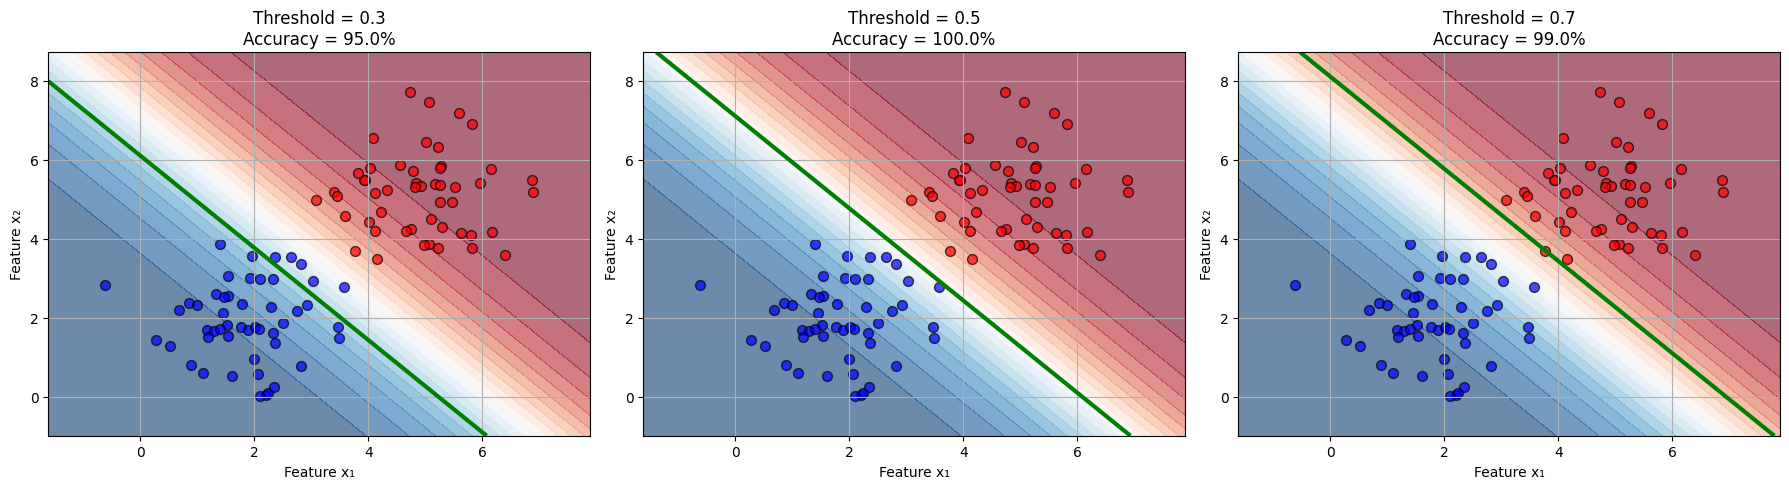


Observations:
• Lower threshold (0.3): More aggressive at predicting Class 1
• Higher threshold (0.7): More conservative, predicts Class 1 only when very confident
• Decision boundary moves based on threshold!


In [28]:
# ============================================================
# EXPERIMENTING WITH DIFFERENT THRESHOLDS
# ============================================================
# Remember: Our model outputs a PROBABILITY (0 to 1), not a class.
# We use a THRESHOLD to convert probability → class prediction:
#
#   If probability ≥ threshold → Predict Class 1
#   If probability < threshold → Predict Class 0
#
# The default threshold is 0.5 (50%), but we can change it!
#
# WHY CHANGE THE THRESHOLD?
# ============================================================
# In real-world problems, different types of errors have different costs:
#
# EXAMPLE 1: Medical Diagnosis (Cancer Detection)
#   - False Negative (miss cancer) = VERY BAD (patient doesn't get treatment)
#   - False Positive (false alarm) = Less bad (extra tests, but patient is safe)
#   → Use LOWER threshold (e.g., 0.3) to catch more potential cancers
#
# EXAMPLE 2: Spam Filter
#   - False Negative (spam in inbox) = Annoying but tolerable
#   - False Positive (important email in spam) = BAD (miss important message)
#   → Use HIGHER threshold (e.g., 0.7) to avoid marking good emails as spam
#
# ============================================================

print("\n" + "=" * 60)
print("Experimenting with Different Thresholds")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: DEFINE THRESHOLDS TO TEST
# ------------------------------------------------------------
# We'll compare 3 different thresholds:
#   - 0.3: Aggressive (predicts Class 1 more often)
#   - 0.5: Standard (default, balanced)
#   - 0.7: Conservative (only predicts Class 1 when very confident)
thresholds = [0.3, 0.5, 0.7]

# ------------------------------------------------------------
# STEP 2: CREATE SUBPLOTS
# ------------------------------------------------------------
# plt.subplots creates multiple plots in a grid
# - 1 row, 3 columns = 3 plots side by side
# - figsize=(18, 5) = 18 inches wide, 5 inches tall total
# - Returns: fig (the figure) and axes (array of 3 axis objects)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ------------------------------------------------------------
# STEP 3: LOOP THROUGH EACH THRESHOLD
# ------------------------------------------------------------
# enumerate() gives us both the index (0, 1, 2) and the value (0.3, 0.5, 0.7)
for idx, threshold in enumerate(thresholds):
    
    # --------------------------------------------------------
    # STEP 3a: MAKE PREDICTIONS WITH THIS THRESHOLD
    # --------------------------------------------------------
    # Use our predict function with the current threshold
    # - y_prob_thresh: probabilities (same for all thresholds)
    # - y_pred_thresh: predictions (different based on threshold!)
    y_prob_thresh, y_pred_thresh = predict(X_b, theta_optimal, threshold)
    
    # --------------------------------------------------------
    # STEP 3b: CALCULATE ACCURACY FOR THIS THRESHOLD
    # --------------------------------------------------------
    # Accuracy may change with different thresholds!
    # For well-separated data like ours, it might stay the same.
    # For overlapping data, threshold choice matters a lot.
    accuracy = np.mean(y_pred_thresh == y) * 100
    
    # --------------------------------------------------------
    # STEP 3c: CREATE MESHGRID FOR VISUALIZATION
    # --------------------------------------------------------
    # Same process as before: create a grid of points to visualize
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create 200×200 grid of points
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )
    
    # Prepare grid for prediction (add bias column)
    X_grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
    
    # Calculate probability at each grid point
    Z = sigmoid(X_grid.dot(theta_optimal))
    Z = Z.reshape(xx1.shape)  # Reshape back to 200×200 for plotting
    
    # --------------------------------------------------------
    # STEP 3d: CREATE THE PLOT
    # --------------------------------------------------------
    # axes[idx] selects the current subplot (0, 1, or 2)
    ax = axes[idx]
    
    # Draw probability heatmap
    # contourf = filled contour (creates the colored regions)
    ax.contourf(xx1, xx2, Z,        # Grid coordinates and probabilities
                levels=20,           # 20 color levels
                cmap='RdBu_r',       # Red-Blue colormap
                alpha=0.6)           # Semi-transparent
    
    # Plot Class 0 points (blue)
    ax.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1],
               c='blue', s=50, alpha=0.7, edgecolors='black', linewidth=1)
    
    # Plot Class 1 points (red)
    ax.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1],
               c='red', s=50, alpha=0.7, edgecolors='black', linewidth=1)
    
    # Draw the decision boundary for THIS threshold
    # KEY DIFFERENCE: levels=[threshold] instead of levels=[0.5]
    # This shows WHERE the boundary is for each threshold!
    #
    # - threshold=0.3: boundary is where P=0.3 (shifted toward Class 0 region)
    # - threshold=0.5: boundary is where P=0.5 (standard position)
    # - threshold=0.7: boundary is where P=0.7 (shifted toward Class 1 region)
    ax.contour(xx1, xx2, Z, 
               levels=[threshold],   # Draw boundary at THIS threshold
               linewidths=3, 
               colors='green')
    
    # Add labels and title
    ax.set_xlabel('Feature x₁')
    ax.set_ylabel('Feature x₂')
    
    # Title shows both the threshold and resulting accuracy
    ax.set_title(f'Threshold = {threshold}\nAccuracy = {accuracy:.1f}%')
    ax.grid(True)

# Adjust spacing so plots don't overlap
plt.tight_layout()
plt.show()

print("\nObservations:")
print("• Lower threshold (0.3): More aggressive at predicting Class 1")
print("• Higher threshold (0.7): More conservative, predicts Class 1 only when very confident")
print("• Decision boundary moves based on threshold!")

# ============================================================
# UNDERSTANDING THE THREE PLOTS:
# ============================================================
#
# THRESHOLD = 0.3 (Left plot):
# - The green line is at P = 0.3
# - This line is CLOSER to the blue cluster
# - MORE points are classified as Class 1
# - Good when: Missing Class 1 is very costly
#
# THRESHOLD = 0.5 (Middle plot):
# - The green line is at P = 0.5 (standard)
# - This line is in the MIDDLE
# - Balanced between classes
# - Good when: Both types of errors are equally bad
#
# THRESHOLD = 0.7 (Right plot):
# - The green line is at P = 0.7
# - This line is CLOSER to the red cluster
# - FEWER points are classified as Class 1
# - Good when: False positives are very costly
#
# NOTICE: The green lines are at DIFFERENT positions!
# - The MODEL (theta) stays the same
# - Only the THRESHOLD changes
# - This moves where we "draw the line" for classification
#
# ============================================================

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. The threshold is a HYPERPARAMETER you can tune
#    - It's not learned from data
#    - You choose it based on your problem's needs
#
# 2. Changing threshold creates a TRADEOFF:
#    - Lower threshold → More Class 1 predictions
#      → Fewer False Negatives, More False Positives
#    - Higher threshold → Fewer Class 1 predictions
#      → More False Negatives, Fewer False Positives
#
# 3. For well-separated data (like ours):
#    - All thresholds may give same accuracy
#    - Because most points are far from the boundary
#
# 4. For overlapping data (harder problems):
#    - Threshold choice significantly affects results
#    - May need to balance precision vs recall
#
# 5. ROC curves and Precision-Recall curves help choose
#    the best threshold for your specific application!
# ============================================================


Comparing: Logistic vs Linear Regression
Linear Regression predictions (WRONG!):

Actual | Linear Pred | Logistic Prob | Issue
------------------------------------------------------------
  1    |    0.9866    |    0.9727    
  0    |    -0.0610    |    0.0312    ← Negative probability!
  1    |    0.6257    |    0.7768    
  0    |    0.0089    |    0.0486    
  1    |    0.8676    |    0.9464    
  0    |    0.0845    |    0.0715    
  1    |    0.9533    |    0.9664    
  1    |    0.8464    |    0.9365    
  0    |    0.3020    |    0.2527    
  0    |    -0.2035    |    0.0117    ← Negative probability!


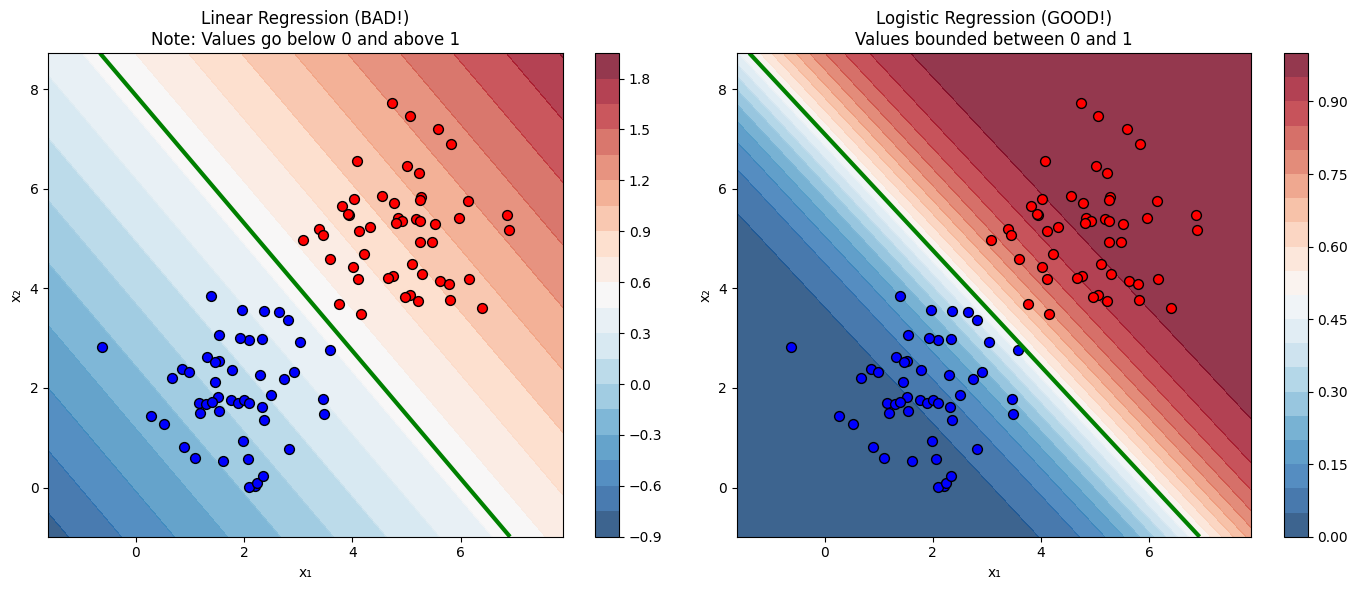


✓ Comparison complete!
Linear regression gives impossible probabilities (< 0 or > 1)
Logistic regression keeps everything in valid range [0, 1]


In [29]:
# ============================================================
# COMPARING: LOGISTIC vs LINEAR REGRESSION
# ============================================================
# You might wonder: "Why can't we just use Linear Regression for 
# classification? Just predict values and round to 0 or 1?"
#
# This cell shows WHY that's a bad idea!
#
# THE PROBLEM WITH LINEAR REGRESSION FOR CLASSIFICATION:
# ============================================================
# Linear Regression predicts ANY number from -∞ to +∞
# But for classification, we need PROBABILITIES: 0 to 1
#
# Linear Regression can give us:
#   - Negative values like -0.3 (What's a -30% probability?!)
#   - Values > 1 like 1.5 (What's a 150% probability?!)
#
# These don't make sense as probabilities!
#
# Logistic Regression FIXES this by using the sigmoid function,
# which ALWAYS outputs values between 0 and 1.
# ============================================================

print("\n" + "=" * 60)
print("Comparing: Logistic vs Linear Regression")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: FIT LINEAR REGRESSION TO CLASSIFICATION DATA
# ------------------------------------------------------------
# We'll use the Normal Equation from Linear Regression:
#   θ = (XᵀX)⁻¹ Xᵀy
#
# This finds θ that minimizes the Mean Squared Error

# Import the inverse function from numpy
from numpy.linalg import inv

# Calculate theta using the Normal Equation
# inv() computes the matrix inverse
# X_b.T = transpose of X_b
# .dot() = matrix multiplication
#
# This is the SAME formula we used in Linear Regression!
# We're applying it to classification data (y = 0 or 1)
theta_linear = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# ------------------------------------------------------------
# STEP 2: MAKE "PREDICTIONS" WITH LINEAR REGRESSION
# ------------------------------------------------------------
# Linear regression prediction: ŷ = Xθ
# This gives us RAW values, NOT probabilities!
y_pred_linear = X_b.dot(theta_linear)

# ------------------------------------------------------------
# STEP 3: COMPARE LINEAR vs LOGISTIC PREDICTIONS
# ------------------------------------------------------------
# Show side-by-side comparison to see the problem

print("Linear Regression predictions (WRONG!):")
print("\nActual | Linear Pred | Logistic Prob | Issue")
print("-" * 60)

# Loop through first 10 examples
for i in range(10):
    linear_val = y_pred_linear[i][0]    # Linear regression output
    logistic_val = y_prob[i][0]          # Logistic regression probability
    
    # Check for invalid probability values
    issue = ""
    if linear_val < 0:
        # Negative value - impossible probability!
        issue = "← Negative probability!"
    elif linear_val > 1:
        # Greater than 1 - impossible probability!
        issue = "← Greater than 1!"
    
    print(f"  {int(y[i][0])}    |    {linear_val:.4f}    |    {logistic_val:.4f}    {issue}")

# ------------------------------------------------------------
# STEP 4: VISUALIZE BOTH METHODS
# ------------------------------------------------------------
# Create side-by-side plots showing the key difference

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ============================================================
# LEFT PLOT: LINEAR REGRESSION (The Bad Way)
# ============================================================
ax = axes[0]

# Create grid for visualization (same process as before)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                        np.linspace(x2_min, x2_max, 200))

# Prepare grid for prediction
X_grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]

# Linear regression predictions (NO sigmoid!)
# Just raw: X · θ
# These values can be ANYTHING - not bounded to 0-1!
Z_linear = X_grid.dot(theta_linear)
Z_linear = Z_linear.reshape(xx1.shape)

# Create heatmap
# NOTICE: The colorbar will show values outside 0-1!
cf = ax.contourf(xx1, xx2, Z_linear, 
                 levels=20, 
                 cmap='RdBu_r', 
                 alpha=0.8)
plt.colorbar(cf, ax=ax)  # Add colorbar to see the value range

# Plot data points
ax.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1],
           c='blue', s=50, edgecolors='black', linewidth=1)
ax.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1],
           c='red', s=50, edgecolors='black', linewidth=1)

# Draw decision boundary at 0.5
ax.contour(xx1, xx2, Z_linear, levels=[0.5], linewidths=3, colors='green')

ax.set_title('Linear Regression (BAD!)\nNote: Values go below 0 and above 1')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')

# ============================================================
# RIGHT PLOT: LOGISTIC REGRESSION (The Good Way)
# ============================================================
ax = axes[1]

# Logistic regression predictions (WITH sigmoid!)
# sigmoid(X · θ) always gives values between 0 and 1
Z_logistic = sigmoid(X_grid.dot(theta_optimal))
Z_logistic = Z_logistic.reshape(xx1.shape)

# Create heatmap
# NOTICE: The colorbar will show values only between 0-1!
cf = ax.contourf(xx1, xx2, Z_logistic, 
                 levels=20, 
                 cmap='RdBu_r', 
                 alpha=0.8)
plt.colorbar(cf, ax=ax)

# Plot data points
ax.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1],
           c='blue', s=50, edgecolors='black', linewidth=1)
ax.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1],
           c='red', s=50, edgecolors='black', linewidth=1)

# Draw decision boundary at 0.5
ax.contour(xx1, xx2, Z_logistic, levels=[0.5], linewidths=3, colors='green')

ax.set_title('Logistic Regression (GOOD!)\nValues bounded between 0 and 1')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')

plt.tight_layout()
plt.show()

print("\n✓ Comparison complete!")
print("Linear regression gives impossible probabilities (< 0 or > 1)")
print("Logistic regression keeps everything in valid range [0, 1]")

# ============================================================
# UNDERSTANDING THE PLOTS:
# ============================================================
#
# LEFT PLOT (Linear Regression - BAD):
# - Look at the colorbar: values go BELOW 0 and ABOVE 1!
# - Deep blue areas might have values like -0.5 (negative!)
# - Deep red areas might have values like 1.5 (over 100%!)
# - These make NO SENSE as probabilities
# - The "decision boundary" (green line) still works, but the
#   values on either side aren't proper probabilities
#
# RIGHT PLOT (Logistic Regression - GOOD):
# - Look at the colorbar: values ONLY between 0 and 1
# - Deep blue = close to 0 (low probability)
# - Deep red = close to 1 (high probability)
# - ALL values are valid probabilities!
# - The sigmoid function SQUASHES everything to 0-1
#
# ============================================================

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Linear Regression is for predicting CONTINUOUS values
#    - House prices, temperatures, stock prices
#    - Output can be any real number
#
# 2. Logistic Regression is for CLASSIFICATION
#    - Spam/not spam, cancer/healthy, cat/dog
#    - Output is a PROBABILITY between 0 and 1
#
# 3. The sigmoid function is the KEY difference
#    - Takes any real number
#    - Outputs a valid probability (0 to 1)
#
# 4. Both have LINEAR decision boundaries
#    - They use the same linear combination: θ₀ + θ₁x₁ + θ₂x₂
#    - But logistic regression interprets it as probability
#
# 5. Using Linear Regression for classification:
#    - Might work for simple cases
#    - But gives meaningless "probabilities"
#    - Don't do it! Use Logistic Regression instead.
#
# 6. The Normal Equation vs Gradient Descent:
#    - Linear Regression: Can use either
#    - Logistic Regression: Must use Gradient Descent
#      (Normal Equation doesn't work with sigmoid)
# ============================================================

Evaluation Metrics: Hands-On Example
Dataset: 1000 examples
Class 0 (Negative): 900 examples (90%)
Class 1 (Positive): 100 examples (10%)

Training complete. Final cost: 0.1125

Comparing Different Thresholds

THRESHOLD = 0.3

Confusion Matrix:
                 Predicted
               Neg  |  Pos
         ─────────────┼─────────
Actual  Neg |   895  |     5
        Pos |     4  |    96

Metrics:
Accuracy:  0.991  (99.1%)
Precision: 0.950  (95.0%)
Recall:    0.960  (96.0%)
F1 Score:  0.955

Interpretation:
• Of 101 predicted positives, 96 were actually positive (95.0% precision)
• Of 100 actual positives, 96 were caught (96.0% recall)
• 5 false alarms (predicted positive but actually negative)
• 4 missed cases (predicted negative but actually positive)

THRESHOLD = 0.5

Confusion Matrix:
                 Predicted
               Neg  |  Pos
         ─────────────┼─────────
Actual  Neg |   900  |     0
        Pos |    18  |    82

Metrics:
Accuracy:  0.982  (98.2%)
Precision: 1.000  (1

C:\Users\kesav\AppData\Local\Temp\ipykernel_12552\370358605.py:234: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx1, xx2, Z, levels=[0.5], linewidths=3, colors='green',


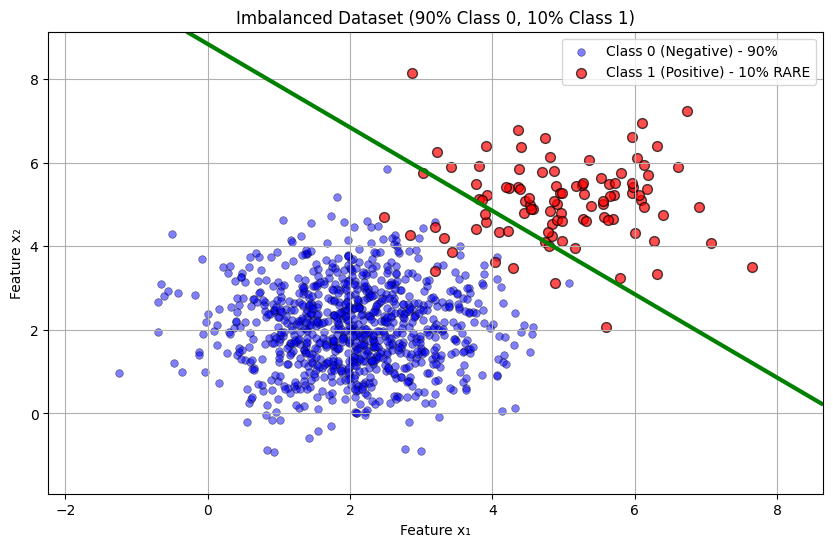

In [30]:
# ============================================================
# EVALUATION METRICS: Beyond Simple Accuracy
# ============================================================
# So far, we've used ACCURACY to measure our model:
#   Accuracy = (correct predictions) / (total predictions)
#
# But accuracy can be MISLEADING, especially with IMBALANCED data!
#
# EXAMPLE: Disease Detection
# - 99% of people are healthy (Class 0)
# - 1% have the disease (Class 1)
#
# A "dumb" model that ALWAYS predicts "healthy" gets 99% accuracy!
# But it's useless - it never catches the disease!
#
# We need BETTER metrics: Precision, Recall, F1 Score
# ============================================================

print("=" * 60)
print("Evaluation Metrics: Hands-On Example")
print("=" * 60)

# ============================================================
# STEP 1: CREATE AN IMBALANCED DATASET
# ============================================================
# We'll create a dataset where one class is RARE (like real diseases)
# This shows why accuracy alone isn't enough

np.random.seed(42)  # For reproducibility
m = 1000  # Total examples

# ------------------------------------------------------------
# Class 0 (Negative): 900 examples (90%) - The COMMON class
# ------------------------------------------------------------
# Like "healthy" patients - most people are in this class
X_class0 = np.random.randn(900, 2) + np.array([2, 2])  # Centered at (2, 2)
y_class0 = np.zeros((900, 1))  # Label = 0

# ------------------------------------------------------------
# Class 1 (Positive): 100 examples (10%) - The RARE class
# ------------------------------------------------------------
# Like "sick" patients - this is what we really want to detect!
X_class1 = np.random.randn(100, 2) + np.array([5, 5])  # Centered at (5, 5)
y_class1 = np.ones((100, 1))  # Label = 1

# Combine and shuffle the data
X_imb = np.vstack([X_class0, X_class1])  # "imb" = imbalanced
y_imb = np.vstack([y_class0, y_class1])

indices = np.random.permutation(m)
X_imb = X_imb[indices]
y_imb = y_imb[indices]

print(f"Dataset: {m} examples")
print(f"Class 0 (Negative): {np.sum(y_imb == 0)} examples (90%)")
print(f"Class 1 (Positive): {np.sum(y_imb == 1)} examples (10%)")

# ============================================================
# STEP 2: TRAIN LOGISTIC REGRESSION
# ============================================================
# Add bias column and train the model

X_imb_b = np.c_[np.ones((m, 1)), X_imb]  # Add bias column
theta_init = np.random.randn(3, 1)  # Random initial parameters

# Train using gradient descent (verbose=False to hide iteration output)
theta_imb, cost_hist_imb = gradient_descent_logistic(
    X_imb_b, y_imb, theta_init, learning_rate=0.1, 
    n_iterations=1000, verbose=False
)

print(f"\nTraining complete. Final cost: {cost_hist_imb[-1]:.4f}")

# ============================================================
# STEP 3: UNDERSTAND THE CONFUSION MATRIX
# ============================================================
#
# The Confusion Matrix shows ALL types of predictions:
#
#                        PREDICTED
#                    Negative | Positive
#              ┌─────────────┼──────────────┐
#    ACTUAL    │             │              │
#   Negative   │     TN      │      FP      │
#              │ True Neg    │ False Pos    │
#              ├─────────────┼──────────────┤
#   Positive   │     FN      │      TP      │
#              │ False Neg   │ True Pos     │
#              └─────────────┴──────────────┘
#
# TN (True Negative):  Predicted Neg, Actually Neg ✓ CORRECT
# TP (True Positive):  Predicted Pos, Actually Pos ✓ CORRECT
# FP (False Positive): Predicted Pos, Actually Neg ✗ WRONG (Type I Error)
#                      Also called "False Alarm"
# FN (False Negative): Predicted Neg, Actually Pos ✗ WRONG (Type II Error)
#                      Also called "Missed Detection"
#
# ============================================================

# ============================================================
# STEP 4: UNDERSTAND THE METRICS
# ============================================================
#
# ACCURACY = (TP + TN) / (TP + TN + FP + FN)
#   "What fraction of ALL predictions were correct?"
#   PROBLEM: Can be high even if we miss all rare cases!
#
# PRECISION = TP / (TP + FP)
#   "Of all POSITIVE predictions, how many were actually positive?"
#   HIGH precision = Few false alarms
#   Think: "When we predict positive, can we trust it?"
#
# RECALL = TP / (TP + FN)
#   "Of all ACTUAL positives, how many did we catch?"
#   Also called "Sensitivity" or "True Positive Rate"
#   HIGH recall = Few missed cases
#   Think: "Are we catching all the positive cases?"
#
# F1 SCORE = 2 * (Precision * Recall) / (Precision + Recall)
#   Harmonic mean of Precision and Recall
#   Balances both metrics into a single number
#   HIGH F1 = Good at both precision AND recall
#
# ============================================================

# Define thresholds to compare
thresholds = [0.3, 0.5, 0.7]

print("\n" + "=" * 60)
print("Comparing Different Thresholds")
print("=" * 60)

# Loop through each threshold
for threshold in thresholds:
    
    # Make predictions with this threshold
    y_prob_imb, y_pred_imb = predict(X_imb_b, theta_imb, threshold)
    
    # --------------------------------------------------------
    # COMPUTE CONFUSION MATRIX
    # --------------------------------------------------------
    # We use boolean operations to count each category:
    # (y_pred_imb == 1) = True where we predicted positive
    # (y_imb == 1) = True where actual is positive
    # & combines them: True only where BOTH are True
    # np.sum() counts the Trues
    
    # True Positive: Predicted 1, Actual 1 (correctly caught positive)
    TP = np.sum((y_pred_imb == 1) & (y_imb == 1))
    
    # True Negative: Predicted 0, Actual 0 (correctly identified negative)
    TN = np.sum((y_pred_imb == 0) & (y_imb == 0))
    
    # False Positive: Predicted 1, Actual 0 (false alarm!)
    FP = np.sum((y_pred_imb == 1) & (y_imb == 0))
    
    # False Negative: Predicted 0, Actual 1 (missed a positive!)
    FN = np.sum((y_pred_imb == 0) & (y_imb == 1))
    
    # --------------------------------------------------------
    # COMPUTE METRICS
    # --------------------------------------------------------
    # Accuracy: Overall correctness
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Precision: Of positive predictions, how many were right?
    # Guard against division by zero with if/else
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall: Of actual positives, how many did we catch?
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # --------------------------------------------------------
    # DISPLAY RESULTS
    # --------------------------------------------------------
    print(f"\n{'='*60}")
    print(f"THRESHOLD = {threshold}")
    print(f"{'='*60}")
    
    # Print confusion matrix in a nice format
    print("\nConfusion Matrix:")
    print(f"                 Predicted")
    print(f"               Neg  |  Pos")
    print(f"         ─────────────┼─────────")
    print(f"Actual  Neg |  {TN:4d}  |  {FP:4d}")  # :4d = 4 digits, right-aligned
    print(f"        Pos |  {FN:4d}  |  {TP:4d}")
    
    print(f"\nMetrics:")
    print(f"Accuracy:  {accuracy:.3f}  ({accuracy*100:.1f}%)")
    print(f"Precision: {precision:.3f}  ({precision*100:.1f}%)")
    print(f"Recall:    {recall:.3f}  ({recall*100:.1f}%)")
    print(f"F1 Score:  {f1:.3f}")
    
    # Print human-readable interpretation
    print(f"\nInterpretation:")
    print(f"• Of {TP+FP} predicted positives, {TP} were actually positive ({precision*100:.1f}% precision)")
    print(f"• Of {TP+FN} actual positives, {TP} were caught ({recall*100:.1f}% recall)")
    
    if FP > 0:
        print(f"• {FP} false alarms (predicted positive but actually negative)")
    if FN > 0:
        print(f"• {FN} missed cases (predicted negative but actually positive)")

# ============================================================
# STEP 5: VISUALIZE THE IMBALANCED DATA
# ============================================================

plt.figure(figsize=(10, 6))

# Plot Class 0 (the majority/common class)
# Smaller dots, more transparent because there are so many
plt.scatter(X_imb[y_imb.flatten() == 0, 0], X_imb[y_imb.flatten() == 0, 1],
            c='blue', s=30, alpha=0.5, edgecolors='black', linewidth=0.5,
            label='Class 0 (Negative) - 90%')

# Plot Class 1 (the minority/rare class)
# Larger dots, more visible because they're important
plt.scatter(X_imb[y_imb.flatten() == 1, 0], X_imb[y_imb.flatten() == 1, 1],
            c='red', s=50, alpha=0.7, edgecolors='black', linewidth=1,
            label='Class 1 (Positive) - 10% RARE')

# Plot decision boundary
x1_min, x1_max = X_imb[:, 0].min() - 1, X_imb[:, 0].max() + 1
x2_min, x2_max = X_imb[:, 1].min() - 1, X_imb[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                        np.linspace(x2_min, x2_max, 200))
X_grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
Z = sigmoid(X_grid.dot(theta_imb))
Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, levels=[0.5], linewidths=3, colors='green',
            label='Decision boundary')
plt.xlabel('Feature x₁')
plt.ylabel('Feature x₂')
plt.title('Imbalanced Dataset (90% Class 0, 10% Class 1)')
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# UNDERSTANDING THE RESULTS:
# ============================================================
#
# THRESHOLD = 0.3 (Lower threshold):
# - MORE positive predictions → Higher Recall (catch more cases)
# - But also more False Positives → Lower Precision
# - Good for: Medical screening (don't want to miss diseases)
#
# THRESHOLD = 0.5 (Standard threshold):
# - Balanced between precision and recall
# - Good for: General use when both errors are equally bad
#
# THRESHOLD = 0.7 (Higher threshold):
# - FEWER positive predictions → Higher Precision (more confident)
# - But might miss some cases → Lower Recall
# - Good for: Spam filters (don't want false alarms)
#
# NOTICE: Even with different thresholds, accuracy stays high!
# This is because 90% of data is Class 0, and we get most of those right.
# That's why accuracy alone is NOT a good metric for imbalanced data!
#
# ============================================================

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Accuracy can be MISLEADING with imbalanced data
#    - A model predicting all Class 0 gets 90% accuracy!
#    - But it catches 0% of the rare class (useless!)
#
# 2. Use the Confusion Matrix to see the FULL picture:
#    - TP, TN, FP, FN tell you exactly what's happening
#    - Not just "how many right" but "what KIND of mistakes"
#
# 3. Precision answers: "Can I trust positive predictions?"
#    - High precision = Few false alarms
#    - Important when false positives are costly
#
# 4. Recall answers: "Am I catching all positives?"
#    - High recall = Few missed cases
#    - Important when false negatives are costly
#
# 5. F1 Score balances precision and recall
#    - Useful when you need both to be good
#    - Penalizes extremes (high precision with low recall or vice versa)
#
# 6. Threshold choice affects the precision-recall tradeoff:
#    - Lower threshold → Higher recall, lower precision
#    - Higher threshold → Higher precision, lower recall
#    - Choose based on your application's needs!
#
# 7. REAL-WORLD EXAMPLES:
#    - Cancer detection: Prioritize RECALL (don't miss cancers!)
#    - Spam filter: Prioritize PRECISION (don't block important emails!)
#    - Fraud detection: Balance both (catch fraud but don't harass customers)
# ============================================================

Demonstrating Overfitting in Logistic Regression
Dataset: 50 examples, 2 features
True relationship: Simple linear separation

Degree 1 Polynomial
Number of features: 3
Training accuracy: 100.0%
Final cost: 0.0657

Degree 3 Polynomial
Number of features: 10
Training accuracy: 100.0%
Final cost: 0.0054

Degree 6 Polynomial
Number of features: 28
Training accuracy: 100.0%
Final cost: 0.0000


C:\Users\kesav\AppData\Local\Temp\ipykernel_12552\1107589708.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


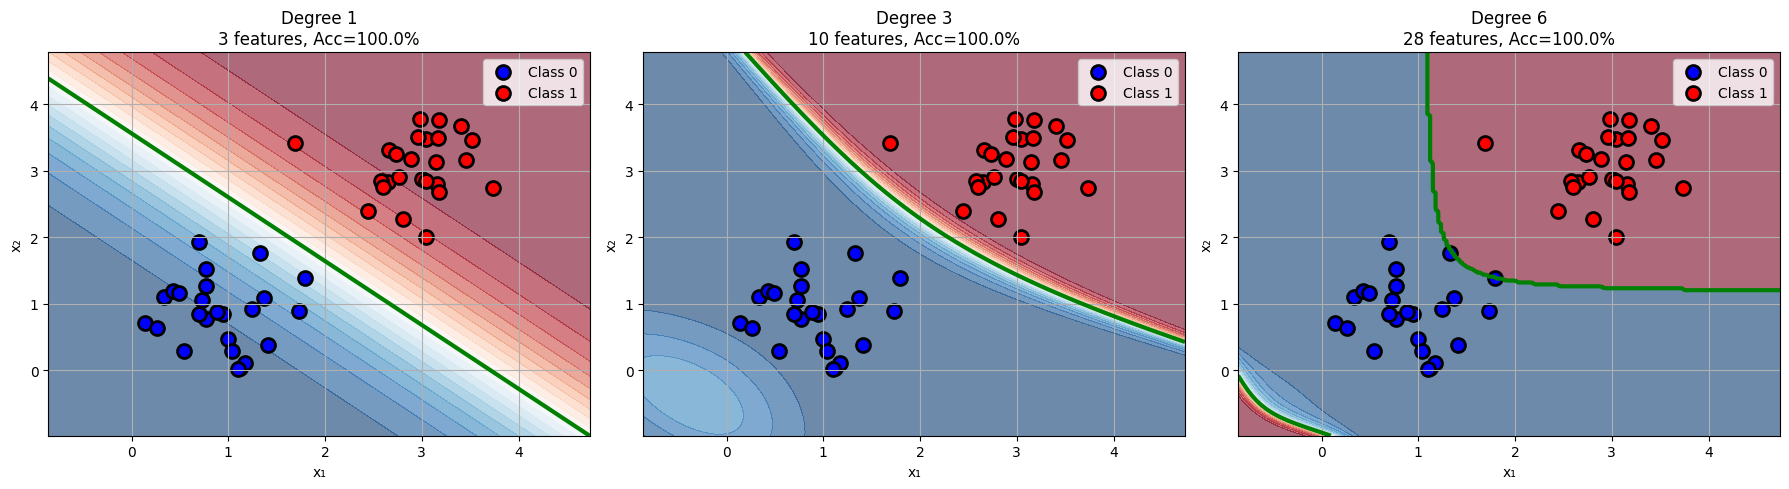


KEY OBSERVATIONS:
Degree 1: Simple line, might underfit slightly
Degree 3: Good balance, smooth boundary
Degree 6: OVERFITTING! Wiggly boundary trying to perfectly fit every point


In [31]:
# ============================================================
# DEMONSTRATING OVERFITTING IN LOGISTIC REGRESSION
# ============================================================
# OVERFITTING happens when a model learns the training data TOO WELL,
# including the noise and random fluctuations.
#
# An overfit model:
#   - Has HIGH accuracy on training data
#   - Has LOW accuracy on new/test data
#   - Has learned patterns that don't generalize
#
# ANALOGY: Memorizing vs Understanding
# - A student who MEMORIZES every practice problem gets 100% on practice
# - But they fail on the real exam because they don't UNDERSTAND
# - An overfit model is like this student!
#
# HOW OVERFITTING HAPPENS:
# - Model is TOO COMPLEX for the data (too many features/parameters)
# - Not enough training data
# - Training for too long
#
# In this cell, we'll create overfitting using POLYNOMIAL FEATURES
# ============================================================

print("=" * 60)
print("Demonstrating Overfitting in Logistic Regression")
print("=" * 60)

# ============================================================
# STEP 1: CREATE A SIMPLE DATASET
# ============================================================
# Small dataset with clear linear separation
# Using few examples makes overfitting more likely!

np.random.seed(42)
m = 50  # Small dataset to make overfitting easier to demonstrate

# Class 0: centered at (1, 1)
# * 0.5 makes the clusters tighter (smaller spread)
X_class0 = np.random.randn(m//2, 2) * 0.5 + np.array([1, 1])
y_class0 = np.zeros((m//2, 1))

# Class 1: centered at (3, 3)
X_class1 = np.random.randn(m//2, 2) * 0.5 + np.array([3, 3])
y_class1 = np.ones((m//2, 1))

# Combine and shuffle
X_simple = np.vstack([X_class0, X_class1])
y_simple = np.vstack([y_class0, y_class1])

indices = np.random.permutation(m)
X_simple = X_simple[indices]
y_simple = y_simple[indices]

print(f"Dataset: {m} examples, 2 features")
print("True relationship: Simple linear separation")

# ============================================================
# STEP 2: DEFINE POLYNOMIAL FEATURES FUNCTION
# ============================================================
# Polynomial features allow us to model NON-LINEAR relationships
# by creating new features from combinations of existing ones.
#
# EXAMPLE with 2 features (x₁, x₂):
#   Degree 1: [1, x₁, x₂]                    → 3 features
#   Degree 2: [1, x₁, x₂, x₁², x₁x₂, x₂²]   → 6 features
#   Degree 3: [1, x₁, x₂, x₁², x₁x₂, x₂², x₁³, x₁²x₂, x₁x₂², x₂³] → 10 features
#   Degree 6: [...]                          → 28 features!
#
# More features = More complex decision boundaries
# But also MORE RISK OF OVERFITTING!

def polynomial_features(X, degree):
    """
    Add polynomial features up to given degree
    
    For 2D input with degree 2:
    [x₁, x₂] → [1, x₁, x₂, x₁², x₁·x₂, x₂²]
    
    This allows the model to learn curved decision boundaries!
    
    Args:
        X: Original features (m × 2)
        degree: Maximum polynomial degree
    
    Returns:
        X_poly: Expanded features with all polynomial combinations
    """
    m, n = X.shape
    X_poly = np.ones((m, 1))  # Start with bias term (column of 1s)
    
    # Add features for each degree level
    # For each degree d, we add terms like x₁^a * x₂^b where a + b = d
    for d in range(1, degree + 1):
        for i in range(d + 1):
            # Create feature: x₁^(d-i) * x₂^i
            # Example for d=2: x₁², x₁x₂, x₂²
            feature = (X[:, 0] ** (d - i)) * (X[:, 1] ** i)
            X_poly = np.c_[X_poly, feature.reshape(-1, 1)]
    
    return X_poly

# ============================================================
# STEP 3: TRAIN MODELS WITH DIFFERENT POLYNOMIAL DEGREES
# ============================================================
# We'll compare:
#   - Degree 1: Linear (might underfit)
#   - Degree 3: Moderate complexity
#   - Degree 6: Very complex (will overfit!)

degrees = [1, 3, 6]

# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, degree in enumerate(degrees):
    print(f"\n{'='*60}")
    print(f"Degree {degree} Polynomial")
    print(f"{'='*60}")
    
    # ------------------------------------------------------------
    # STEP 3a: ADD POLYNOMIAL FEATURES
    # ------------------------------------------------------------
    X_poly = polynomial_features(X_simple, degree)
    print(f"Number of features: {X_poly.shape[1]}")
    # Degree 1: 3 features, Degree 3: 10 features, Degree 6: 28 features!
    
    # ------------------------------------------------------------
    # STEP 3b: TRAIN THE MODEL
    # ------------------------------------------------------------
    # Initialize theta with small random values
    # * 0.01 helps with numerical stability for high-degree polynomials
    theta_init = np.random.randn(X_poly.shape[1], 1) * 0.01
    
    theta_poly, cost_hist = gradient_descent_logistic(
        X_poly, y_simple, theta_init, 
        learning_rate=0.1, n_iterations=1000, verbose=False
    )
    
    # ------------------------------------------------------------
    # STEP 3c: EVALUATE
    # ------------------------------------------------------------
    y_prob, y_pred = predict(X_poly, theta_poly)
    accuracy = np.mean(y_pred == y_simple) * 100
    
    print(f"Training accuracy: {accuracy:.1f}%")
    print(f"Final cost: {cost_hist[-1]:.4f}")
    
    # ------------------------------------------------------------
    # STEP 3d: VISUALIZE DECISION BOUNDARY
    # ------------------------------------------------------------
    ax = axes[idx]
    
    # Create mesh grid for visualization
    x1_min, x1_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
    x2_min, x2_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                            np.linspace(x2_min, x2_max, 200))
    
    # Add polynomial features to mesh points
    X_mesh = np.c_[xx1.ravel(), xx2.ravel()]
    X_mesh_poly = polynomial_features(X_mesh, degree)
    
    # Get predictions for mesh
    Z = sigmoid(X_mesh_poly.dot(theta_poly))
    Z = Z.reshape(xx1.shape)
    
    # Plot probability heatmap
    ax.contourf(xx1, xx2, Z, levels=20, cmap='RdBu_r', alpha=0.6)
    
    # Plot data points (larger for visibility)
    ax.scatter(X_simple[y_simple.flatten() == 0, 0], 
               X_simple[y_simple.flatten() == 0, 1],
               c='blue', s=100, edgecolors='black', linewidth=2, label='Class 0')
    ax.scatter(X_simple[y_simple.flatten() == 1, 0], 
               X_simple[y_simple.flatten() == 1, 1],
               c='red', s=100, edgecolors='black', linewidth=2, label='Class 1')
    
    # Plot decision boundary
    ax.contour(xx1, xx2, Z, levels=[0.5], linewidths=3, colors='green')
    
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title(f'Degree {degree}\n{X_poly.shape[1]} features, Acc={accuracy:.1f}%')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("KEY OBSERVATIONS:")
print("=" * 60)
print("Degree 1: Simple line, might underfit slightly")
print("Degree 3: Good balance, smooth boundary")  
print("Degree 6: OVERFITTING! Wiggly boundary trying to perfectly fit every point")

# ============================================================
# UNDERSTANDING OVERFITTING:
# ============================================================
#
# DEGREE 1 (Linear):
# - Simple straight line
# - May not capture complex patterns
# - Low risk of overfitting
#
# DEGREE 3 (Moderate):
# - Smooth curved boundary
# - Can capture some non-linear patterns
# - Good balance between complexity and simplicity
#
# DEGREE 6 (High):
# - VERY wiggly boundary!
# - Tries to wrap around EVERY point
# - This is OVERFITTING - the model learned the NOISE
# - Will perform BADLY on new data
#
# VISUAL SIGNS OF OVERFITTING:
# - Decision boundary is very wiggly/complex
# - Boundary seems to "wrap around" individual points
# - Small changes in data would dramatically change boundary
#
# ============================================================

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. More features ≠ better model
#    - Degree 6 has 28 features but overfits!
#    - Sometimes simpler is better
#
# 2. Training accuracy can be MISLEADING
#    - Degree 6 gets 100% training accuracy
#    - But it would fail on new data!
#
# 3. Visual inspection helps detect overfitting
#    - Wiggly, complex boundaries = likely overfitting
#    - Smooth boundaries = better generalization
#
# 4. The solution: REGULARIZATION (next cell!)
#    - Keeps the complex features
#    - But prevents parameters from getting too large
#    - Results in smoother, more generalizable boundaries
# ============================================================

In [32]:
# ============================================================
# IMPLEMENTING REGULARIZED LOGISTIC REGRESSION
# ============================================================
# Regularization is our weapon against overfitting!
#
# THE PROBLEM:
# When we have too many features (like degree 6 polynomial),
# the model can "memorize" training data instead of learning patterns
#
# THE SOLUTION: L2 Regularization (Ridge Regularization)
# Add a penalty term that punishes large parameter values
#
# INTUITION:
# Large theta values = Complex, wiggly decision boundaries
# Small theta values = Simpler, smoother decision boundaries
#
# By penalizing large thetas, we force the model to keep things simple!
# ============================================================

print("\n" + "=" * 60)
print("Implementing Regularized Logistic Regression")
print("=" * 60)

# ============================================================
# REGULARIZED COST FUNCTION
# ============================================================
# Original cost: J(theta) = -(1/m) * sum[y*log(y_hat) + (1-y)*log(1-y_hat)]
#
# Regularized cost adds a PENALTY TERM:
# J_reg(theta) = J(theta) + (lambda/2m) * sum(theta_j^2)
#
# ASCII Diagram of how regularization affects cost:
#
#   Cost
#    |
#    |  Original cost       Regularization penalty
#    |       |                      |
#    |       v                      v
#    |   --------              --------
#    |  | Cross  |     +      | Lambda |
#    |  |Entropy |            |* ||theta||^2
#    |   --------              --------
#    |       \                  /
#    |        \                /
#    |         \    Total    /
#    |          \   Cost   /
#    |           v       v
#    |          ----------
#    |         |  J_reg   |
#    |          ----------
#
# Key points:
# - lambda (lambda_reg) controls regularization strength
# - lambda = 0: No regularization (original cost)
# - lambda = large: Heavy penalty on large thetas
# - We DON'T regularize theta_0 (bias term)!
# ============================================================

def compute_cost_regularized(X, y, theta, lambda_reg):
    """
    Compute regularized cross-entropy cost

    J(theta) = -(1/m) * sum[y*log(y_hat) + (1-y)*log(1-y_hat)] + (lambda/2m) * sum(theta_j^2)
    """

    # STEP 1: Get the number of training examples
    m = len(y)

    # STEP 2: Compute predictions using sigmoid
    # This is the standard forward pass: y_hat = sigmoid(X * theta)
    predictions = sigmoid(X.dot(theta))

    # STEP 3: Clip predictions to avoid log(0) errors
    # log(0) = -infinity, which would crash our calculations!
    epsilon = 1e-10  # Tiny number (0.0000000001)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)

    # STEP 4: Compute standard cross-entropy cost
    # This measures how wrong our predictions are
    # Formula: -(1/m) * sum[y*log(y_hat) + (1-y)*log(1-y_hat)]
    cross_entropy = -(1/m) * np.sum(
        y * np.log(predictions) +           # Cost when y=1
        (1 - y) * np.log(1 - predictions)   # Cost when y=0
    )

    # STEP 5: Compute regularization term
    # Formula: (lambda/2m) * sum(theta_j^2) for j >= 1
    #
    # IMPORTANT: theta[1:] excludes theta[0] (the bias term)
    # We don't penalize the bias because:
    # - Bias just shifts the decision boundary up/down
    # - It doesn't contribute to overfitting
    #
    # np.sum(theta[1:]**2) = theta_1^2 + theta_2^2 + ... + theta_n^2
    reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)

    # STEP 6: Total cost = cross-entropy + regularization penalty
    return cross_entropy + reg_term


# ============================================================
# REGULARIZED GRADIENT DESCENT
# ============================================================
# The gradient also changes with regularization!
#
# Original gradient: (1/m) * X^T * (y_hat - y)
#
# Regularized gradient:
# For theta_0:   (1/m) * X^T * (y_hat - y)           [No penalty]
# For theta_j:   (1/m) * X^T * (y_hat - y) + (lambda/m) * theta_j
#
# The extra term (lambda/m) * theta_j "pulls" theta toward zero!
#
# Update rule becomes:
# theta_j = theta_j - alpha * [gradient + (lambda/m) * theta_j]
#
# Which can be rewritten as:
# theta_j = theta_j * (1 - alpha*lambda/m) - alpha * gradient
#                         ^^^^^^^^^^^^^^^
#                         This shrinks theta!
# ============================================================

def gradient_descent_regularized(X, y, theta, learning_rate, n_iterations, lambda_reg, verbose=False):
    """
    Gradient descent with L2 regularization

    Gradient: (1/m) * X^T * (sigma(X*theta) - y) + (lambda/m) * theta
    """

    # STEP 1: Get number of training examples
    m = len(y)

    # STEP 2: Initialize list to track cost over iterations
    cost_history = []

    # STEP 3: Run gradient descent for specified iterations
    for iteration in range(n_iterations):

        # STEP 3a: Forward pass - compute predictions
        # y_hat = sigmoid(X * theta)
        predictions = sigmoid(X.dot(theta))

        # STEP 3b: Compute errors (how far off are we?)
        # errors = y_hat - y (positive if too high, negative if too low)
        errors = predictions - y

        # STEP 3c: Compute standard gradient
        # gradient = (1/m) * X^T * errors
        # This tells us which direction to adjust theta
        gradient = (1/m) * X.T.dot(errors)

        # STEP 3d: Add regularization term to gradient
        # For theta_j (j >= 1): add (lambda/m) * theta_j
        # This pushes thetas toward zero, keeping them small
        #
        # gradient[1:] += (lambda/m) * theta[1:]
        # - We skip gradient[0] because we don't regularize bias
        gradient[1:] += (lambda_reg / m) * theta[1:]

        # STEP 3e: Update parameters
        # theta = theta - learning_rate * gradient
        # With regularization, this effectively shrinks large thetas!
        theta = theta - learning_rate * gradient

        # STEP 3f: Compute and store the cost
        cost = compute_cost_regularized(X, y, theta, lambda_reg)
        cost_history.append(cost)

        # STEP 3g: Print progress if verbose mode is on
        if verbose and iteration % 200 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.6f}")

    # STEP 4: Return final parameters and cost history
    return theta, cost_history

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. Regularization adds a penalty for large parameter values
#
# 2. The regularization strength (lambda) controls the trade-off:
#    - lambda = 0: No regularization, risk of overfitting
#    - lambda = small: Mild regularization, balanced
#    - lambda = large: Heavy regularization, risk of underfitting
#
# 3. We NEVER regularize the bias term (theta_0)
#
# 4. L2 regularization (Ridge) uses squared penalties:
#    Penalty = lambda * (theta_1^2 + theta_2^2 + ... + theta_n^2)
#
# 5. The gradient gets an extra term that "shrinks" parameters:
#    gradient_j += (lambda/m) * theta_j
# ============================================================

print("Regularized functions implemented!")



Implementing Regularized Logistic Regression
Regularized functions implemented!



Comparing: No Regularization vs Regularization
Using degree 6 polynomial: 28 features

Lambda = 0
Training accuracy: 100.0%
Final cost: 0.0000
Parameter norm: 50.1270

Lambda = 0.1
Training accuracy: 100.0%
Final cost: 0.2413
Parameter norm: 15.5329

Lambda = 1


C:\Users\kesav\AppData\Local\Temp\ipykernel_12552\1107589708.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Training accuracy: 100.0%
Final cost: 0.0244
Parameter norm: 1.1916

Lambda = 10
Training accuracy: 100.0%
Final cost: 0.0066
Parameter norm: 0.1053


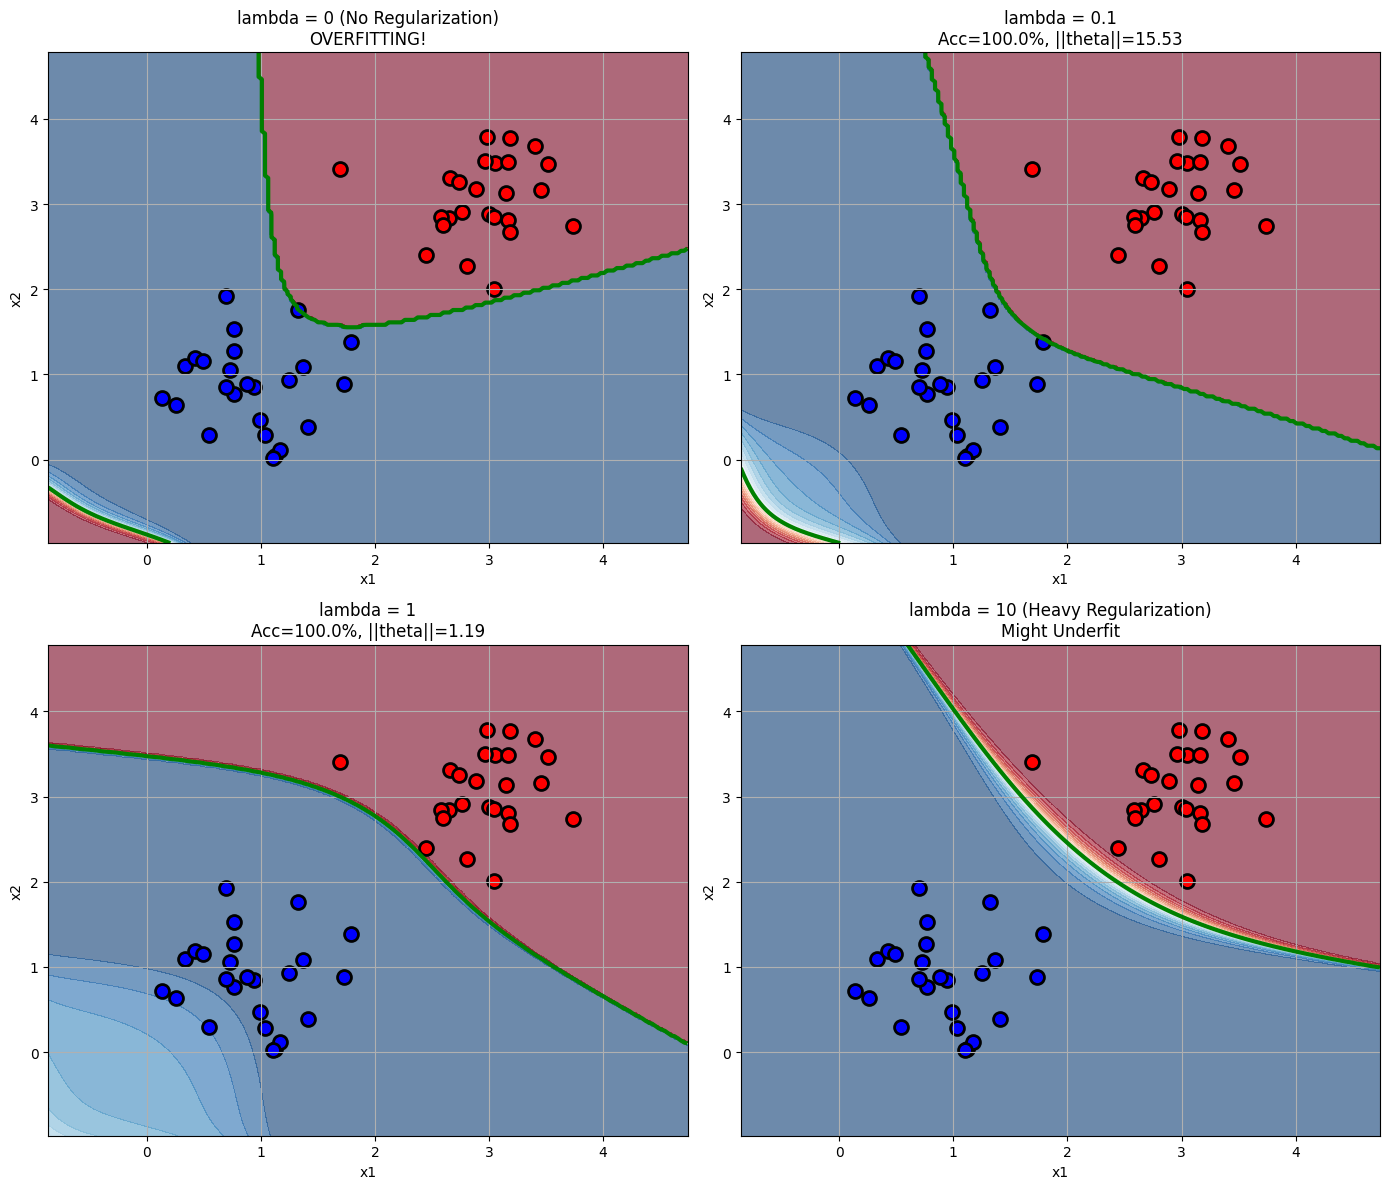


OBSERVATIONS:
lambda=0:   Wiggly boundary, overfitting, large parameters
lambda=0.1: Smoother boundary, better balance
lambda=1:   Even smoother, good generalization
lambda=10:  Very smooth, might be too simple (underfitting)


In [33]:
# ============================================================
# COMPARING: NO REGULARIZATION VS REGULARIZATION
# ============================================================
# Now let's SEE regularization in action!
#
# We'll train the same model (degree 6 polynomial) with
# different regularization strengths (lambda values) and
# visualize how the decision boundary changes.
#
# WHAT TO EXPECT:
# - lambda = 0:    No regularization -> Overfitting (wiggly boundary)
# - lambda = 0.1:  Light regularization -> Smoother boundary
# - lambda = 1:    Medium regularization -> Even smoother
# - lambda = 10:   Heavy regularization -> Might underfit (too simple)
#
# It's like adjusting a dial:
#
#   OVERFIT                                      UNDERFIT
#   (Complex)                                    (Simple)
#     |                                             |
#     v                                             v
#   [====|========|========|========|========|====]
#   lambda=0   0.1       1        10       100
#             ^
#             |
#        Sweet spot!
# ============================================================

print("\n" + "=" * 60)
print("Comparing: No Regularization vs Regularization")
print("=" * 60)

# Use degree 6 polynomial (prone to overfitting)
# With 2 features, degree 6 gives us 28 parameters!
# That's a lot of flexibility to overfit
degree = 6
X_poly_demo = polynomial_features(X_simple, degree)

print(f"Using degree {degree} polynomial: {X_poly_demo.shape[1]} features")

# ============================================================
# EXPERIMENT: Test different lambda values
# ============================================================
# We'll compare:
# - lambda = 0:   No regularization (baseline)
# - lambda = 0.1: Light regularization
# - lambda = 1:   Medium regularization
# - lambda = 10:  Heavy regularization
# ============================================================

lambdas = [0, 0.1, 1, 10]

# Create a 2x2 grid of plots (one for each lambda)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()  # Convert 2x2 array to 1D for easier indexing

# ============================================================
# TRAINING LOOP: Train a model for each lambda value
# ============================================================
for idx, lambda_reg in enumerate(lambdas):
    print(f"\n{'='*60}")
    print(f"Lambda = {lambda_reg}")
    print(f"{'='*60}")

    # STEP 1: Initialize theta with small random values
    # Small values help gradient descent start smoothly
    theta_init = np.random.randn(X_poly_demo.shape[1], 1) * 0.01

    # STEP 2: Train using regularized gradient descent
    # - 1000 iterations for convergence
    # - learning_rate = 0.1
    # - Current lambda value
    theta_reg, cost_hist_reg = gradient_descent_regularized(
        X_poly_demo, y_simple, theta_init,
        learning_rate=0.1, n_iterations=1000,
        lambda_reg=lambda_reg, verbose=False
    )

    # STEP 3: Make predictions and calculate accuracy
    y_prob_reg, y_pred_reg = predict(X_poly_demo, theta_reg)
    accuracy = np.mean(y_pred_reg == y_simple) * 100

    # STEP 4: Calculate parameter norm (measure of complexity)
    # ||theta|| = sqrt(theta_1^2 + theta_2^2 + ... + theta_n^2)
    # Larger norm = more complex model
    # theta[1:] excludes bias term
    param_norm = np.linalg.norm(theta_reg[1:])

    # STEP 5: Print results
    print(f"Training accuracy: {accuracy:.1f}%")
    print(f"Final cost: {cost_hist_reg[-1]:.4f}")
    print(f"Parameter norm: {param_norm:.4f}")  # Lower = simpler model

    # ============================================================
    # VISUALIZATION: Decision Boundary
    # ============================================================
    ax = axes[idx]

    # Create a mesh grid for visualization
    # This lets us color every point in the 2D space
    x1_min, x1_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
    x2_min, x2_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                            np.linspace(x2_min, x2_max, 200))

    # Get predictions for every point in the mesh
    X_mesh = np.c_[xx1.ravel(), xx2.ravel()]  # Stack x1 and x2 coordinates
    X_mesh_poly = polynomial_features(X_mesh, degree)  # Add polynomial features
    Z = sigmoid(X_mesh_poly.dot(theta_reg))  # Get probabilities
    Z = Z.reshape(xx1.shape)  # Reshape back to grid

    # Plot probability heatmap
    # Blue = Class 0 region, Red = Class 1 region
    ax.contourf(xx1, xx2, Z, levels=20, cmap='RdBu_r', alpha=0.6)

    # Plot actual data points
    # Class 0: Blue circles
    ax.scatter(X_simple[y_simple.flatten() == 0, 0],
               X_simple[y_simple.flatten() == 0, 1],
               c='blue', s=100, edgecolors='black', linewidth=2)
    # Class 1: Red circles
    ax.scatter(X_simple[y_simple.flatten() == 1, 0],
               X_simple[y_simple.flatten() == 1, 1],
               c='red', s=100, edgecolors='black', linewidth=2)

    # Draw decision boundary (where probability = 0.5)
    ax.contour(xx1, xx2, Z, levels=[0.5], linewidths=3, colors='green')

    # Set title based on lambda value
    title = f'lambda = {lambda_reg}'
    if lambda_reg == 0:
        title += ' (No Regularization)\nOVERFITTING!'  # Wiggly boundary!
    elif lambda_reg == 10:
        title += ' (Heavy Regularization)\nMight Underfit'  # Too simple?
    else:
        title += f'\nAcc={accuracy:.1f}%, ||theta||={param_norm:.2f}'

    ax.set_title(title, fontsize=12)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.grid(True)

plt.tight_layout()
plt.show()

# ============================================================
# OBSERVATIONS SUMMARY
# ============================================================
# Look at the plots and notice:
#
# lambda=0 (Top-Left):
#   - Wiggly, complex boundary trying to fit every point
#   - High accuracy but BAD generalization
#   - Large parameter norm (complex model)
#
# lambda=0.1 (Top-Right):
#   - Smoother boundary
#   - Still fits data well
#   - Smaller parameter norm
#
# lambda=1 (Bottom-Left):
#   - Even smoother boundary
#   - Good balance between fit and simplicity
#
# lambda=10 (Bottom-Right):
#   - Very smooth (almost linear) boundary
#   - Might be TOO simple (underfitting)
#   - Very small parameter norm
# ============================================================

print("\n" + "=" * 60)
print("OBSERVATIONS:")
print("=" * 60)
print("lambda=0:   Wiggly boundary, overfitting, large parameters")
print("lambda=0.1: Smoother boundary, better balance")
print("lambda=1:   Even smoother, good generalization")
print("lambda=10:  Very smooth, might be too simple (underfitting)")



Finding Optimal Lambda via Cross-Validation
Testing degree 6 polynomial with different lambda values:

  Lambda |  CV Accuracy |  Std Dev
----------------------------------------
    0.00 |       0.9000 |   0.1549
    0.01 |       0.9400 |   0.0800
    0.10 |       0.9000 |   0.1549


C:\Users\kesav\AppData\Local\Temp\ipykernel_12552\1107589708.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


    0.50 |       0.9200 |   0.1166
    1.00 |       0.9200 |   0.1166
    5.00 |       0.9800 |   0.0400
   10.00 |       0.9000 |   0.1549
   50.00 |       1.0000 |   0.0000

Best lambda = 50 (CV Accuracy = 1.0000)


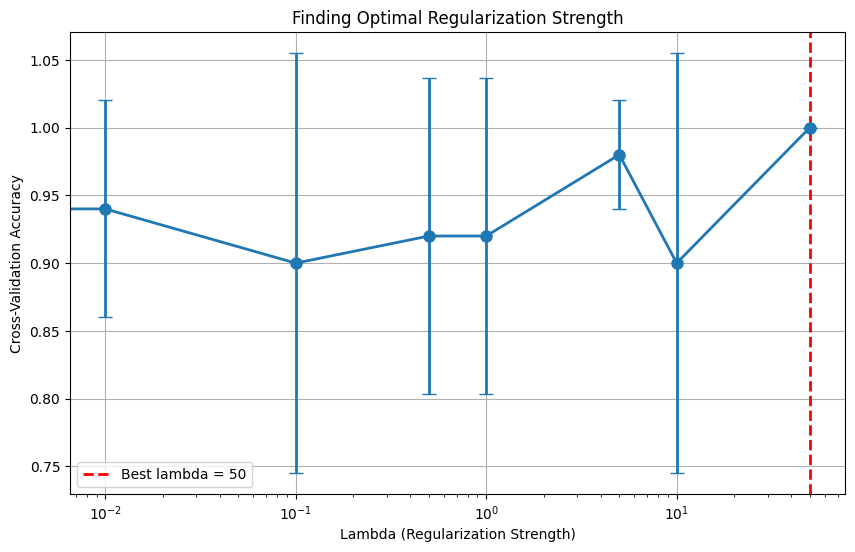


You should see a curve:
* Left (low lambda): Overfitting -> lower CV accuracy
* Middle: Sweet spot -> highest CV accuracy
* Right (high lambda): Underfitting -> lower CV accuracy


In [34]:
# ============================================================
# FINDING OPTIMAL LAMBDA VIA CROSS-VALIDATION
# ============================================================
# How do we find the BEST lambda value?
# We can't just pick one randomly - we need a systematic approach!
#
# THE ANSWER: K-Fold Cross-Validation
#
# WHAT IS K-FOLD CROSS-VALIDATION?
# Instead of a single train/test split, we:
# 1. Divide data into K equal parts (folds)
# 2. Use K-1 folds for training, 1 fold for validation
# 3. Repeat K times (each fold gets to be validation once)
# 4. Average the scores
#
# ASCII Diagram of 5-Fold CV:
#
#   Fold 1:  [VAL][TRAIN][TRAIN][TRAIN][TRAIN]
#   Fold 2:  [TRAIN][VAL][TRAIN][TRAIN][TRAIN]
#   Fold 3:  [TRAIN][TRAIN][VAL][TRAIN][TRAIN]
#   Fold 4:  [TRAIN][TRAIN][TRAIN][VAL][TRAIN]
#   Fold 5:  [TRAIN][TRAIN][TRAIN][TRAIN][VAL]
#
# Final Score = Average of all 5 validation scores
#
# WHY USE CROSS-VALIDATION?
# - More reliable than a single split
# - Uses all data for both training AND validation
# - Reduces variance in our estimate
# ============================================================

print("\n" + "=" * 60)
print("Finding Optimal Lambda via Cross-Validation")
print("=" * 60)


def k_fold_cv_regularized(X, y, degree, lambda_reg, k=5):
    """
    K-fold cross-validation for regularized logistic regression

    Parameters:
    - X: Input features (original, not polynomial)
    - y: Labels
    - degree: Polynomial degree to use
    - lambda_reg: Regularization strength to test
    - k: Number of folds (default 5)

    Returns:
    - mean_score: Average accuracy across all folds
    - std_score: Standard deviation of accuracies
    """

    # STEP 1: Calculate number of examples and fold size
    m = len(X)
    fold_size = m // k  # Integer division for equal-sized folds

    # STEP 2: Initialize list to store accuracy for each fold
    scores = []

    # STEP 3: Loop through each fold
    for fold in range(k):

        # STEP 3a: Determine validation set boundaries
        # Fold 0: indices 0 to fold_size
        # Fold 1: indices fold_size to 2*fold_size
        # etc.
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size

        # STEP 3b: Split data into validation and training sets
        # Validation set: the current fold
        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]

        # Training set: everything EXCEPT the current fold
        # np.vstack stacks arrays vertically (combines them)
        X_train = np.vstack([X[:val_start], X[val_end:]])
        y_train = np.vstack([y[:val_start], y[val_end:]])

        # STEP 3c: Add polynomial features to both sets
        # Important: fit features on training, apply same to validation
        X_train_poly = polynomial_features(X_train, degree)
        X_val_poly = polynomial_features(X_val, degree)

        # STEP 3d: Train the model on training set
        theta_init = np.random.randn(X_train_poly.shape[1], 1) * 0.01
        theta_cv, _ = gradient_descent_regularized(
            X_train_poly, y_train, theta_init,
            learning_rate=0.1, n_iterations=500,
            lambda_reg=lambda_reg, verbose=False
        )

        # STEP 3e: Evaluate on validation set (NOT training set!)
        # This gives us an unbiased estimate of performance
        y_val_prob, y_val_pred = predict(X_val_poly, theta_cv)
        accuracy = np.mean(y_val_pred == y_val)
        scores.append(accuracy)

    # STEP 4: Return mean and standard deviation of scores
    # Mean: Our best estimate of true performance
    # Std: How much variation between folds (lower is better)
    return np.mean(scores), np.std(scores)


# ============================================================
# TEST DIFFERENT LAMBDA VALUES
# ============================================================
# We'll try a range of lambda values and see which gives
# the best cross-validation accuracy
# ============================================================

degree = 6  # Use degree 6 (our overfitting-prone model)

# Lambda values to test (spanning several orders of magnitude)
# Starting from 0 (no regularization) to 50 (heavy regularization)
lambdas_test = [0, 0.01, 0.1, 0.5, 1, 5, 10, 50]

print(f"Testing degree {degree} polynomial with different lambda values:\n")
print(f"{'Lambda':>8} | {'CV Accuracy':>12} | {'Std Dev':>8}")
print("-" * 40)

# Store results for plotting
cv_scores = []
cv_stds = []

# ============================================================
# RUN CROSS-VALIDATION FOR EACH LAMBDA
# ============================================================
for lambda_reg in lambdas_test:
    # Run 5-fold CV for this lambda value
    mean_score, std_score = k_fold_cv_regularized(
        X_simple, y_simple, degree, lambda_reg, k=5
    )

    # Store results
    cv_scores.append(mean_score)
    cv_stds.append(std_score)

    # Print results
    print(f"{lambda_reg:8.2f} | {mean_score:12.4f} | {std_score:8.4f}")

# ============================================================
# FIND THE BEST LAMBDA
# ============================================================
# The best lambda is the one with highest CV accuracy
best_idx = np.argmax(cv_scores)  # Index of maximum score
best_lambda = lambdas_test[best_idx]

print(f"\n{'='*60}")
print(f"Best lambda = {best_lambda} (CV Accuracy = {cv_scores[best_idx]:.4f})")
print(f"{'='*60}")

# ============================================================
# PLOT THE CROSS-VALIDATION CURVE
# ============================================================
# This visualization helps us understand the bias-variance tradeoff
#
# Expected shape: Often U-shaped (inverted)
#
#   Accuracy
#     ^
#     |         ____
#     |        /    \
#     |       /      \
#     |      /        \
#     |_____/          \_____
#     |
#     +-----------------------> Lambda
#    Low                    High
#    (Overfit)          (Underfit)
# ============================================================

plt.figure(figsize=(10, 6))

# Plot accuracy vs lambda with error bars (showing std dev)
# Error bars show the uncertainty in our CV estimate
plt.errorbar(lambdas_test, cv_scores, yerr=cv_stds,
             marker='o', linewidth=2, capsize=5, markersize=8)

# Draw vertical line at best lambda
plt.axvline(x=best_lambda, color='red', linestyle='--',
            linewidth=2, label=f'Best lambda = {best_lambda}')

# Labels and formatting
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Finding Optimal Regularization Strength')
plt.xscale('log')  # Log scale because lambdas span multiple orders of magnitude
plt.grid(True)
plt.legend()
plt.show()

# ============================================================
# INTERPRETATION
# ============================================================
# The CV curve reveals the bias-variance tradeoff:
#
# LEFT SIDE (Low lambda):
# - Little regularization
# - Model is complex, can overfit
# - High variance, low bias
# - CV accuracy may be lower due to overfitting
#
# RIGHT SIDE (High lambda):
# - Heavy regularization
# - Model is simple, can underfit
# - Low variance, high bias
# - CV accuracy drops because model is too simple
#
# SWEET SPOT (Middle):
# - Optimal balance
# - Best CV accuracy
# - This is our best_lambda!
# ============================================================

print("\nYou should see a curve:")
print("* Left (low lambda): Overfitting -> lower CV accuracy")
print("* Middle: Sweet spot -> highest CV accuracy")
print("* Right (high lambda): Underfitting -> lower CV accuracy")


In [35]:
# ============================================================
# FINAL EVALUATION: TRAIN/TEST SPLIT
# ============================================================
# Now we put everything together!
#
# We'll compare two models on a proper train/test split:
# 1. No Regularization (lambda = 0) - prone to overfitting
# 2. With Regularization (lambda = best_lambda from CV)
#
# THE KEY METRIC: Train-Test Gap
# - If Train Acc >> Test Acc: OVERFITTING!
# - If Train Acc similar to Test Acc: GOOD GENERALIZATION!
#
# ASCII Diagram - What we're looking for:
#
#   Accuracy
#     ^
#  100|----[Train]----            <- Overfit model
#     |                              (Memorizes training data)
#   90|         [Test]
#     |
#   85|----[Train]----[Test]----  <- Good model
#     |                              (Generalizes well)
#     +-------------------------->
#        No Reg      With Reg
# ============================================================

print("\n" + "=" * 60)
print("Final Evaluation: Train/Test Split")
print("=" * 60)

# ============================================================
# STEP 1: GENERATE A LARGER DATASET
# ============================================================
# We need more data for a proper train/test split
# 80% for training, 20% for testing
# ============================================================

np.random.seed(100)  # For reproducibility
m_total = 200  # Total examples (more than before!)

# Generate Class 0: centered at (1, 1)
# 100 examples with Gaussian noise (std = 0.5)
X_class0_full = np.random.randn(m_total//2, 2) * 0.5 + np.array([1, 1])
y_class0_full = np.zeros((m_total//2, 1))

# Generate Class 1: centered at (3, 3)
# 100 examples with Gaussian noise (std = 0.5)
X_class1_full = np.random.randn(m_total//2, 2) * 0.5 + np.array([3, 3])
y_class1_full = np.ones((m_total//2, 1))

# Combine both classes
X_full = np.vstack([X_class0_full, X_class1_full])
y_full = np.vstack([y_class0_full, y_class1_full])

# ============================================================
# STEP 2: SHUFFLE THE DATA
# ============================================================
# Important: Always shuffle before splitting!
# This ensures both train and test sets have a good mix of classes
# ============================================================

indices = np.random.permutation(m_total)  # Random ordering
X_full = X_full[indices]
y_full = y_full[indices]

# ============================================================
# STEP 3: SPLIT INTO TRAIN AND TEST SETS
# ============================================================
# 80/20 split is common:
# - 80% (160 examples) for training
# - 20% (40 examples) for testing
#
# IMPORTANT: Test set is NEVER used during training!
# It simulates "new, unseen data" to evaluate generalization
# ============================================================

split_idx = int(0.8 * m_total)  # 160

# Training set: First 80%
X_train_final = X_full[:split_idx]
y_train_final = y_full[:split_idx]

# Test set: Last 20% (NEVER touched during training!)
X_test_final = X_full[split_idx:]
y_test_final = y_full[split_idx:]

print(f"Training set: {len(X_train_final)} examples")
print(f"Test set: {len(X_test_final)} examples")

# ============================================================
# STEP 4: PREPARE POLYNOMIAL FEATURES
# ============================================================
# We use degree 6 for both models to make the comparison fair
# ============================================================

degree = 6

# Add polynomial features to BOTH train and test sets
X_train_poly = polynomial_features(X_train_final, degree)
X_test_poly = polynomial_features(X_test_final, degree)

# ============================================================
# MODEL 1: NO REGULARIZATION (lambda = 0)
# ============================================================
# This model is FREE to overfit
# It will likely have:
# - Very high training accuracy
# - Lower test accuracy
# - Large train-test gap (BAD!)
# ============================================================

print(f"\n{'='*60}")
print("Model 1: No Regularization (lambda=0)")
print(f"{'='*60}")

# Initialize and train
theta_init = np.random.randn(X_train_poly.shape[1], 1) * 0.01
theta_no_reg, _ = gradient_descent_regularized(
    X_train_poly, y_train_final, theta_init,
    learning_rate=0.1, n_iterations=1000,
    lambda_reg=0,  # NO regularization!
    verbose=False
)

# Predict on BOTH training and test sets
y_train_pred_no_reg = predict(X_train_poly, theta_no_reg)[1]
y_test_pred_no_reg = predict(X_test_poly, theta_no_reg)[1]

# Calculate accuracies
train_acc_no_reg = np.mean(y_train_pred_no_reg == y_train_final) * 100
test_acc_no_reg = np.mean(y_test_pred_no_reg == y_test_final) * 100

print(f"Training accuracy: {train_acc_no_reg:.2f}%")
print(f"Test accuracy: {test_acc_no_reg:.2f}%")
print(f"Gap: {train_acc_no_reg - test_acc_no_reg:.2f}% <- OVERFITTING!")

# ============================================================
# MODEL 2: WITH REGULARIZATION (lambda = best_lambda)
# ============================================================
# This model uses our optimal lambda from cross-validation
# It should have:
# - Slightly lower training accuracy
# - Higher (or similar) test accuracy
# - Small train-test gap (GOOD!)
# ============================================================

print(f"\n{'='*60}")
print(f"Model 2: With Regularization (lambda={best_lambda})")
print(f"{'='*60}")

# Initialize and train with regularization
theta_init = np.random.randn(X_train_poly.shape[1], 1) * 0.01
theta_with_reg, _ = gradient_descent_regularized(
    X_train_poly, y_train_final, theta_init,
    learning_rate=0.1, n_iterations=1000,
    lambda_reg=best_lambda,  # Use optimal lambda!
    verbose=False
)

# Predict on BOTH training and test sets
y_train_pred_reg = predict(X_train_poly, theta_with_reg)[1]
y_test_pred_reg = predict(X_test_poly, theta_with_reg)[1]

# Calculate accuracies
train_acc_reg = np.mean(y_train_pred_reg == y_train_final) * 100
test_acc_reg = np.mean(y_test_pred_reg == y_test_final) * 100

print(f"Training accuracy: {train_acc_reg:.2f}%")
print(f"Test accuracy: {test_acc_reg:.2f}%")
print(f"Gap: {train_acc_reg - test_acc_reg:.2f}% <- GOOD!")

# ============================================================
# SUMMARY COMPARISON
# ============================================================
# Now we can clearly see the benefit of regularization!
#
# What to look for:
# - No Regularization: High train acc, lower test acc, BIG gap
# - With Regularization: Similar train/test acc, SMALL gap
#
# The regularized model generalizes better to unseen data!
# ============================================================

print(f"\n{'='*60}")
print("SUMMARY")
print(f"{'='*60}")
print(f"\n{'Model':<25} | {'Train Acc':<10} | {'Test Acc':<10} | {'Gap':<10}")
print("-" * 70)
print(f"{'No Regularization':<25} | {train_acc_no_reg:>9.2f}% | {test_acc_no_reg:>9.2f}% | {train_acc_no_reg - test_acc_no_reg:>9.2f}%")
print(f"{'With Regularization':<25} | {train_acc_reg:>9.2f}% | {test_acc_reg:>9.2f}% | {train_acc_reg - test_acc_reg:>9.2f}%")

# ============================================================
# KEY TAKEAWAYS FROM THIS NOTEBOOK
# ============================================================
# 1. Logistic Regression uses sigmoid to output probabilities
#
# 2. Cross-Entropy (Log Loss) is the proper cost function
#
# 3. Gradient Descent optimizes the parameters
#
# 4. Decision boundary separates classes (linear for degree 1)
#
# 5. Polynomial features can create non-linear boundaries
#    BUT too many features can cause OVERFITTING
#
# 6. L2 Regularization penalizes large parameters
#    - Prevents overfitting
#    - Creates smoother decision boundaries
#
# 7. Cross-Validation helps find optimal lambda
#    - Use K-fold CV, not just one split
#    - Average across folds for reliable estimate
#
# 8. Train/Test Gap is key indicator:
#    - Large gap = Overfitting
#    - Small gap = Good generalization
# ============================================================

print("\nRegularization reduces the gap -> Better generalization!")



Final Evaluation: Train/Test Split
Training set: 160 examples
Test set: 40 examples

Model 1: No Regularization (lambda=0)
Training accuracy: 100.00%
Test accuracy: 97.50%
Gap: 2.50% <- OVERFITTING!

Model 2: With Regularization (lambda=50)
Training accuracy: 100.00%
Test accuracy: 100.00%
Gap: 0.00% <- GOOD!

SUMMARY

Model                     | Train Acc  | Test Acc   | Gap       
----------------------------------------------------------------------
No Regularization         |    100.00% |     97.50% |      2.50%
With Regularization       |    100.00% |    100.00% |      0.00%

Regularization reduces the gap -> Better generalization!


C:\Users\kesav\AppData\Local\Temp\ipykernel_12552\1107589708.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [36]:
# ============================================================
# ROC CURVE IMPLEMENTATION
# ============================================================
# ROC = Receiver Operating Characteristic
#
# WHAT IS AN ROC CURVE?
# It's a graph that shows the tradeoff between:
# - True Positive Rate (TPR) = Recall = Sensitivity
# - False Positive Rate (FPR) = 1 - Specificity
#
# WHY DO WE NEED IT?
# Remember how changing the threshold affects predictions?
# - Low threshold (0.3): More "Yes" predictions, catches more positives
#                        BUT also more false alarms
# - High threshold (0.7): Fewer "Yes" predictions, fewer false alarms
#                         BUT might miss some positives
#
# The ROC curve shows ALL possible thresholds at once!
#
# ASCII Diagram:
#
#   TPR (Recall)
#     ^
#   1 |        .----- Perfect!
#     |      .'
#     |    .'   <- Our model (good!)
#     |  .'
#     |.'- - - - - <- Random guessing (diagonal)
#   0 +-----------> FPR
#     0           1
#
# The curve shows: "If I want this much TPR, what FPR do I have to accept?"
# ============================================================

print("=" * 60)
print("ROC Curve Implementation")
print("=" * 60)

# Import libraries (in case this cell is run independently)
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# STEP 1: GENERATE TEST DATASET
# ============================================================
# We create a simple 2-class dataset to demonstrate ROC curves
# ============================================================

np.random.seed(42)  # For reproducibility
m = 200  # Total number of examples

# Generate Class 0: centered at (1, 1) with some noise
X_class0 = np.random.randn(m//2, 2) * 0.8 + np.array([1, 1])
y_class0 = np.zeros((m//2, 1))  # Labels = 0

# Generate Class 1: centered at (3, 3) with some noise
X_class1 = np.random.randn(m//2, 2) * 0.8 + np.array([3, 3])
y_class1 = np.ones((m//2, 1))  # Labels = 1

# Combine both classes into one dataset
X_roc = np.vstack([X_class0, X_class1])
y_roc = np.vstack([y_class0, y_class1])

# ============================================================
# STEP 2: TRAIN A LOGISTIC REGRESSION MODEL
# ============================================================
# We need probability predictions to create an ROC curve
# ============================================================

# Add bias column (column of 1s)
X_roc_b = np.c_[np.ones((m, 1)), X_roc]

# Initialize random theta values
theta_init = np.random.randn(3, 1)

# Train using gradient descent (function defined earlier in notebook)
theta_roc, _ = gradient_descent_logistic(
    X_roc_b, y_roc, theta_init,
    learning_rate=0.1, n_iterations=1000,
    verbose=False
)

# ============================================================
# STEP 3: GET PROBABILITY PREDICTIONS
# ============================================================
# For ROC curves, we need PROBABILITIES, not 0/1 predictions
# This lets us test different thresholds
# ============================================================

y_probs = sigmoid(X_roc_b.dot(theta_roc))

print(f"Model trained on {m} examples")
print(f"Probabilities range: [{y_probs.min():.4f}, {y_probs.max():.4f}]")

# ============================================================
# STEP 4: DEFINE FUNCTION TO COMPUTE TPR AND FPR
# ============================================================
# At any given threshold, we can compute:
# - TPR (True Positive Rate) = TP / (TP + FN) = Recall
#   "Of all actual positives, how many did we catch?"
#
# - FPR (False Positive Rate) = FP / (FP + TN)
#   "Of all actual negatives, how many did we falsely flag?"
#
# Confusion Matrix reminder:
#                    Predicted
#                  Pos    |   Neg
#            +------------+--------+
#   Actual   |     TP     |   FN   |
#   Pos      | (correct!) | (miss) |
#            +------------+--------+
#   Actual   |     FP     |   TN   |
#   Neg      | (false    | (correct!)
#            |  alarm!)   |        |
#            +------------+--------+
# ============================================================

def compute_rates(y_true, y_probs, threshold):
    """
    Compute TPR and FPR at a specific threshold

    Parameters:
    - y_true: Actual labels (0 or 1)
    - y_probs: Predicted probabilities (0 to 1)
    - threshold: Classification threshold

    Returns:
    - TPR, FPR, TP, FP, TN, FN
    """
    # Convert probabilities to 0/1 predictions using threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Count True Positives: predicted 1, actually 1
    TP = np.sum((y_pred == 1) & (y_true == 1))

    # Count False Positives: predicted 1, actually 0
    FP = np.sum((y_pred == 1) & (y_true == 0))

    # Count True Negatives: predicted 0, actually 0
    TN = np.sum((y_pred == 0) & (y_true == 0))

    # Count False Negatives: predicted 0, actually 1
    FN = np.sum((y_pred == 0) & (y_true == 1))

    # Calculate TPR (True Positive Rate) = Recall
    # "What fraction of actual positives did we catch?"
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Calculate FPR (False Positive Rate)
    # "What fraction of actual negatives did we incorrectly flag?"
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

    return TPR, FPR, TP, FP, TN, FN

# ============================================================
# STEP 5: TEST AT DIFFERENT THRESHOLDS
# ============================================================
# Let's see how TPR and FPR change as we vary the threshold
# ============================================================

print("\n" + "=" * 60)
print("Performance at Different Thresholds")
print("=" * 60)
print(f"\n{'Threshold':>10} | {'TPR (Recall)':>13} | {'FPR':>8} | {'Precision':>10}")
print("-" * 60)

test_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

for thresh in test_thresholds:
    # Compute rates at this threshold
    TPR, FPR, TP, FP, TN, FN = compute_rates(y_roc, y_probs, thresh)

    # Also compute precision for comparison
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"{thresh:>10.1f} | {TPR:>13.3f} | {FPR:>8.3f} | {precision:>10.3f}")

# ============================================================
# KEY OBSERVATIONS:
# ============================================================
# As threshold DECREASES (0.9 -> 0.1):
# - TPR INCREASES (we catch more positives)
# - FPR INCREASES (we make more false alarms)
# - We're saying "Yes" more often!
#
# As threshold INCREASES (0.1 -> 0.9):
# - TPR DECREASES (we miss more positives)
# - FPR DECREASES (fewer false alarms)
# - We're more conservative!
#
# This is the fundamental tradeoff in classification!
# ============================================================

print("\nObservation:")
print("* As threshold decreases -> TPR increases, FPR increases")
print("* As threshold increases -> TPR decreases, FPR decreases")


ROC Curve Implementation
Model trained on 200 examples
Probabilities range: [0.0040, 0.9995]

Performance at Different Thresholds

 Threshold |  TPR (Recall) |      FPR |  Precision
------------------------------------------------------------
       0.1 |         1.000 |    0.360 |      0.735
       0.3 |         0.990 |    0.120 |      0.892
       0.5 |         0.970 |    0.040 |      0.960
       0.7 |         0.930 |    0.000 |      1.000
       0.9 |         0.800 |    0.000 |      1.000

Observation:
* As threshold decreases -> TPR increases, FPR increases
* As threshold increases -> TPR decreases, FPR decreases



Creating ROC Curve
Computed ROC curve with 100 threshold points
FPR range: [0.000, 1.000]
TPR range: [0.000, 1.000]


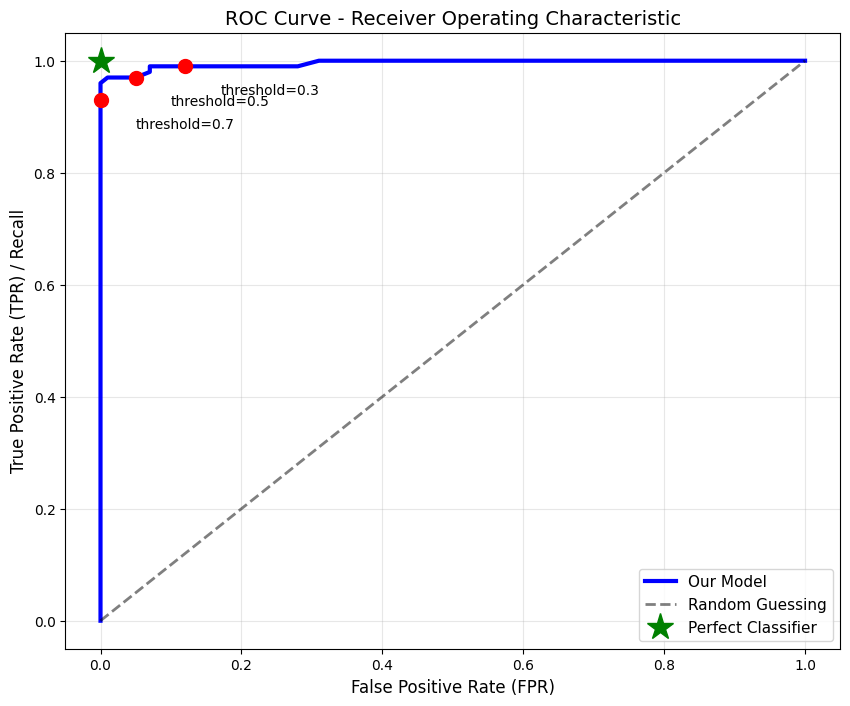


ROC curve plotted!


In [37]:
# ============================================================
# CREATING THE ROC CURVE
# ============================================================
# Now we'll create the actual ROC curve by testing MANY thresholds
#
# The process:
# 1. Pick many thresholds from 0 to 1 (e.g., 0.00, 0.01, 0.02, ...)
# 2. At each threshold, compute TPR and FPR
# 3. Plot (FPR, TPR) for each threshold
# 4. Connect the dots to form the ROC curve!
#
# ASCII Diagram of what we're building:
#
#   TPR
#   1.0 +------------------*  <- threshold ~0 (predict all 1s)
#       |                .'
#       |              .'
#       |            .'     <- Each point is a different threshold
#       |          .'
#       |        .'
#   0.5 +      .'
#       |    .'
#       |  .'
#       |.'______________ <- threshold ~1 (predict all 0s)
#   0.0 +------------------
#       0.0              1.0
#                 FPR
# ============================================================

print("\n" + "=" * 60)
print("Creating ROC Curve")
print("=" * 60)


def compute_roc_curve(y_true, y_probs):
    """
    Compute ROC curve by testing many thresholds

    Parameters:
    - y_true: Actual labels (0 or 1)
    - y_probs: Predicted probabilities from our model

    Returns:
    - fpr_list: False Positive Rates at each threshold
    - tpr_list: True Positive Rates at each threshold
    - thresholds: The threshold values tested
    """

    # STEP 1: Create many thresholds from 0 to 1
    # We use 100 points for a smooth curve
    # np.linspace(0, 1, 100) = [0.0, 0.0101, 0.0202, ..., 1.0]
    thresholds = np.linspace(0, 1, 100)

    # STEP 2: Initialize empty lists to store TPR and FPR
    tpr_list = []
    fpr_list = []

    # STEP 3: Loop through each threshold
    for threshold in thresholds:
        # Compute TPR and FPR at this threshold
        # (using our compute_rates function from before)
        TPR, FPR, _, _, _, _ = compute_rates(y_true, y_probs, threshold)

        # Store the results
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # STEP 4: Convert to numpy arrays and return
    return np.array(fpr_list), np.array(tpr_list), thresholds


# ============================================================
# COMPUTE THE ROC CURVE FOR OUR MODEL
# ============================================================
fpr, tpr, thresholds = compute_roc_curve(y_roc, y_probs)

print(f"Computed ROC curve with {len(thresholds)} threshold points")
print(f"FPR range: [{fpr.min():.3f}, {fpr.max():.3f}]")
print(f"TPR range: [{tpr.min():.3f}, {tpr.max():.3f}]")

# ============================================================
# PLOT THE ROC CURVE
# ============================================================
# Key elements of an ROC plot:
#
# 1. The ROC Curve (our model's performance)
# 2. The Diagonal Line (random guessing baseline)
# 3. The Top-Left Corner (perfect classifier goal)
# ============================================================

plt.figure(figsize=(10, 8))

# Plot the ROC curve (our model)
# X-axis: FPR, Y-axis: TPR
plt.plot(fpr, tpr, linewidth=3, label='Our Model', color='blue')

# Plot the diagonal line (random guessing)
# A random classifier has TPR = FPR at all points
# This is our "baseline" - we want to be ABOVE this!
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Guessing', alpha=0.5)

# ============================================================
# MARK SPECIFIC THRESHOLDS ON THE CURVE
# ============================================================
# This helps visualize where different thresholds land
# ============================================================
specific_thresholds = [0.3, 0.5, 0.7]

for thresh in specific_thresholds:
    # Find the index closest to this threshold
    idx = np.argmin(np.abs(thresholds - thresh))

    # Plot a red dot at this point
    plt.plot(fpr[idx], tpr[idx], 'ro', markersize=10)

    # Add a label showing the threshold value
    plt.annotate(f'threshold={thresh}',
                 xy=(fpr[idx], tpr[idx]),
                 xytext=(fpr[idx] + 0.05, tpr[idx] - 0.05),
                 fontsize=10)

# Mark the perfect classifier point (top-left corner)
# This is where FPR=0 and TPR=1 (the ideal!)
plt.plot(0, 1, 'g*', markersize=20, label='Perfect Classifier')

# ============================================================
# ADD LABELS AND FORMATTING
# ============================================================
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.title('ROC Curve - Receiver Operating Characteristic', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Set axis limits with small padding
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.show()

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. The curve shows TPR vs FPR at ALL possible thresholds
#
# 2. Each point on the curve is a different threshold choice
#
# 3. Moving along the curve:
#    - Lower threshold -> Move toward top-right (high TPR, high FPR)
#    - Higher threshold -> Move toward bottom-left (low TPR, low FPR)
#
# 4. A good model has a curve that "hugs" the top-left corner
#
# 5. The diagonal represents random guessing (useless model)
#    - Any curve below the diagonal is WORSE than random!
# ============================================================

print("\nROC curve plotted!")


In [38]:
# ============================================================
# INTERPRETING THE ROC CURVE
# ============================================================
# Now that we've built the ROC curve, let's understand what it tells us!
#
# This is a summary of how to "read" an ROC curve and make decisions.
# ============================================================

print("\n" + "=" * 60)
print("Interpreting the ROC Curve")
print("=" * 60)

# ============================================================
# The explanation is printed as text for easy reading
# ============================================================

print("""
KEY INSIGHTS:

1. THE DIAGONAL LINE (Random Guessing):
   * If you flip a coin to make predictions
   * TPR = FPR (e.g., if FPR=0.3, then TPR=0.3)
   * No better than random!

2. CURVES ABOVE THE DIAGONAL:
   * Better than random guessing
   * The further above, the better
   * Our model should be here

3. THE TOP-LEFT CORNER (Perfect Classifier):
   * TPR = 1.0 (catches all positives)
   * FPR = 0.0 (no false alarms)
   * The holy grail!

4. MOVEMENT ALONG THE CURVE:
   * Moving RIGHT (increasing FPR):
     -> Lowering threshold
     -> More aggressive predictions
     -> Higher TPR but also higher FPR

   * Moving LEFT (decreasing FPR):
     -> Raising threshold
     -> More conservative predictions
     -> Lower FPR but also lower TPR

5. THE TRADEOFF:
   * Every point on the curve is a different threshold
   * You CHOOSE where to operate based on your needs
   * Cancer screening? -> High TPR (rightward point)
   * Spam filter? -> Low FPR (leftward point)
""")

# ============================================================
# ADDITIONAL CONTEXT FOR BEGINNERS:
# ============================================================
#
# REAL-WORLD EXAMPLES:
#
# Example 1: Medical Diagnosis (Cancer Screening)
# ------------------------------------------------
# - Priority: DON'T MISS any cancer cases (high TPR is critical!)
# - Acceptable: Some false alarms (we can do more tests)
# - Choice: Pick a LOW threshold (move rightward on curve)
# - Result: High TPR (catch most cancers), accept higher FPR
#
# Example 2: Spam Email Filter
# ------------------------------------------------
# - Priority: DON'T put important emails in spam (low FPR is critical!)
# - Acceptable: Some spam gets through
# - Choice: Pick a HIGH threshold (move leftward on curve)
# - Result: Low FPR (few false alarms), accept lower TPR
#
# Example 3: Fraud Detection
# ------------------------------------------------
# - Need to balance: catch fraudsters but don't annoy customers
# - Choice: Find a middle threshold
# - Result: Balanced TPR and FPR
#
#
# HOW TO COMPARE MODELS:
# ----------------------
# The ROC curve lets you compare different models:
#
#   TPR
#     ^
#   1 |   Model A (better!)
#     |   ........
#     |  .        .
#     | .   Model B
#     |.   -----
#     |   -
#     | --
#     +-------------> FPR
#
# Model A's curve is "above" Model B's curve
# -> Model A is better at ALL thresholds!
#
# ============================================================



Interpreting the ROC Curve

KEY INSIGHTS:

1. THE DIAGONAL LINE (Random Guessing):
   * If you flip a coin to make predictions
   * TPR = FPR (e.g., if FPR=0.3, then TPR=0.3)
   * No better than random!

2. CURVES ABOVE THE DIAGONAL:
   * Better than random guessing
   * The further above, the better
   * Our model should be here

3. THE TOP-LEFT CORNER (Perfect Classifier):
   * TPR = 1.0 (catches all positives)
   * FPR = 0.0 (no false alarms)
   * The holy grail!

4. MOVEMENT ALONG THE CURVE:
   * Moving RIGHT (increasing FPR):
     -> Lowering threshold
     -> More aggressive predictions
     -> Higher TPR but also higher FPR

   * Moving LEFT (decreasing FPR):
     -> Raising threshold
     -> More conservative predictions
     -> Lower FPR but also lower TPR

5. THE TRADEOFF:
   * Every point on the curve is a different threshold
   * You CHOOSE where to operate based on your needs
   * Cancer screening? -> High TPR (rightward point)
   * Spam filter? -> Low FPR (leftward point


Computing AUC (Area Under the Curve)
AUC Score: 0.9955

AUC Interpretation:
* 99.5% probability that model ranks:
  - A random positive example HIGHER than
  - A random negative example

AUC Scale:
* AUC = 1.0     -> Perfect classifier (impossible in practice)
* AUC = 0.9-1.0 -> Excellent
* AUC = 0.8-0.9 -> Very Good
* AUC = 0.7-0.8 -> Good
* AUC = 0.6-0.7 -> Mediocre
* AUC = 0.5     -> Random guessing (useless!)
* AUC < 0.5     -> Worse than random (something's inverted!)


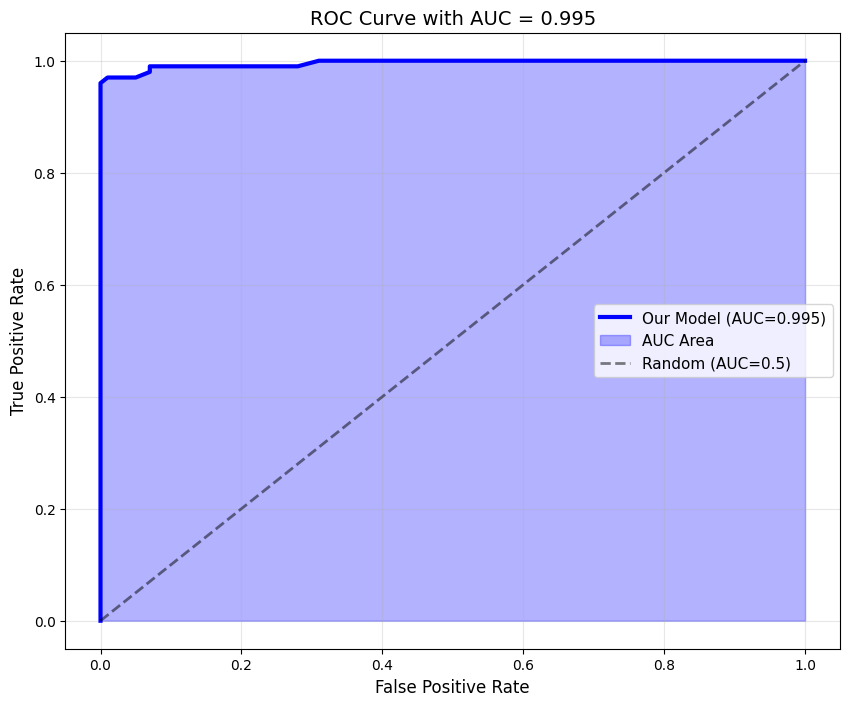


AUC computed and visualized!


In [39]:
# ============================================================
# COMPUTING AUC (AREA UNDER THE CURVE)
# ============================================================
# AUC is a single number that summarizes the entire ROC curve!
#
# WHAT IS AUC?
# It's literally the area under the ROC curve.
#
# ASCII Diagram:
#
#   TPR
#   1.0 +---------.
#       |       .' |
#       |     .'   |
#       |   .'     |    <- AUC = shaded area
#       | .'       |       (the blue region)
#       |.'________|
#   0.0 +-----------
#       0.0       1.0
#             FPR
#
# WHY IS AUC USEFUL?
# 1. Single number to compare models (higher is better)
# 2. Threshold-independent (evaluates ALL thresholds at once)
# 3. Easy to interpret probability meaning
#
# INTUITION:
# AUC = Probability that a randomly chosen positive example
#       is ranked higher than a randomly chosen negative example
#
# Example: If AUC = 0.9, then 90% of the time, the model gives
#          a higher probability to a true positive than a true negative
# ============================================================

print("\n" + "=" * 60)
print("Computing AUC (Area Under the Curve)")
print("=" * 60)


def compute_auc(fpr, tpr):
    """
    Compute AUC using the trapezoidal rule

    The trapezoidal rule approximates the area under a curve
    by dividing it into trapezoids and summing their areas.

    ASCII visualization of trapezoidal rule:
          _____
         |    /|
         |   / |  <- Each section is a trapezoid
         |  /  |
         | /   |
         |/____|

    Area of trapezoid = (base) * (height1 + height2) / 2

    Parameters:
    - fpr: False Positive Rates (x-coordinates)
    - tpr: True Positive Rates (y-coordinates)

    Returns:
    - auc: The area under the ROC curve
    """

    # STEP 1: Sort by FPR to ensure proper ordering
    # (The curve should go from left to right)
    sorted_indices = np.argsort(fpr)
    fpr_sorted = fpr[sorted_indices]
    tpr_sorted = tpr[sorted_indices]

    # STEP 2: Compute area using numpy's trapezoid function
    # This automatically applies the trapezoidal rule
    # np.trapezoid(y_values, x_values) computes the area
    auc = np.trapezoid(tpr_sorted, fpr_sorted)

    return auc


# ============================================================
# COMPUTE AUC FOR OUR MODEL
# ============================================================
auc_score = compute_auc(fpr, tpr)

print(f"AUC Score: {auc_score:.4f}")

# ============================================================
# INTERPRET THE AUC SCORE
# ============================================================
print("\nAUC Interpretation:")
print(f"* {auc_score:.1%} probability that model ranks:")
print(f"  - A random positive example HIGHER than")
print(f"  - A random negative example")

# ============================================================
# AUC SCALE REFERENCE
# ============================================================
# This helps you understand what your AUC score means
# ============================================================
print("\nAUC Scale:")
print("* AUC = 1.0     -> Perfect classifier (impossible in practice)")
print("* AUC = 0.9-1.0 -> Excellent")
print("* AUC = 0.8-0.9 -> Very Good")
print("* AUC = 0.7-0.8 -> Good")
print("* AUC = 0.6-0.7 -> Mediocre")
print("* AUC = 0.5     -> Random guessing (useless!)")
print("* AUC < 0.5     -> Worse than random (something's inverted!)")

# ============================================================
# VISUALIZE THE AUC AS SHADED AREA
# ============================================================
# We'll plot the ROC curve and shade the area underneath
# to visually show what AUC represents
# ============================================================

plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, linewidth=3,
         label=f'Our Model (AUC={auc_score:.3f})', color='blue')

# Shade the area under the curve
# This is the AUC! The blue shaded region.
plt.fill_between(fpr, tpr, alpha=0.3, color='blue', label='AUC Area')

# Plot the diagonal (random classifier baseline)
# Random classifier has AUC = 0.5 (half the square)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2,
         label='Random (AUC=0.5)', alpha=0.5)

# Labels and formatting
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'ROC Curve with AUC = {auc_score:.3f}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.show()

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. AUC summarizes the entire ROC curve in one number
#
# 2. AUC ranges from 0 to 1:
#    - 1.0 = Perfect (never achievable in practice)
#    - 0.5 = Random guessing
#    - < 0.5 = Worse than random (check your labels!)
#
# 3. AUC is threshold-independent:
#    - Useful when you don't know the best threshold yet
#    - Great for comparing different models
#
# 4. Intuitive meaning:
#    - AUC = P(positive ranked higher than negative)
#    - Higher AUC = Better separation between classes
#
# 5. When to use AUC:
#    - Comparing multiple models
#    - Imbalanced datasets (AUC is more robust than accuracy)
#    - When threshold choice will be made later
# ============================================================

print("\nAUC computed and visualized!")



Comparing Multiple Models via ROC

Training model with lambda=0...
  AUC = 0.9953

Training model with lambda=1...
  AUC = 0.9955

Training model with lambda=10...
  AUC = 0.9955


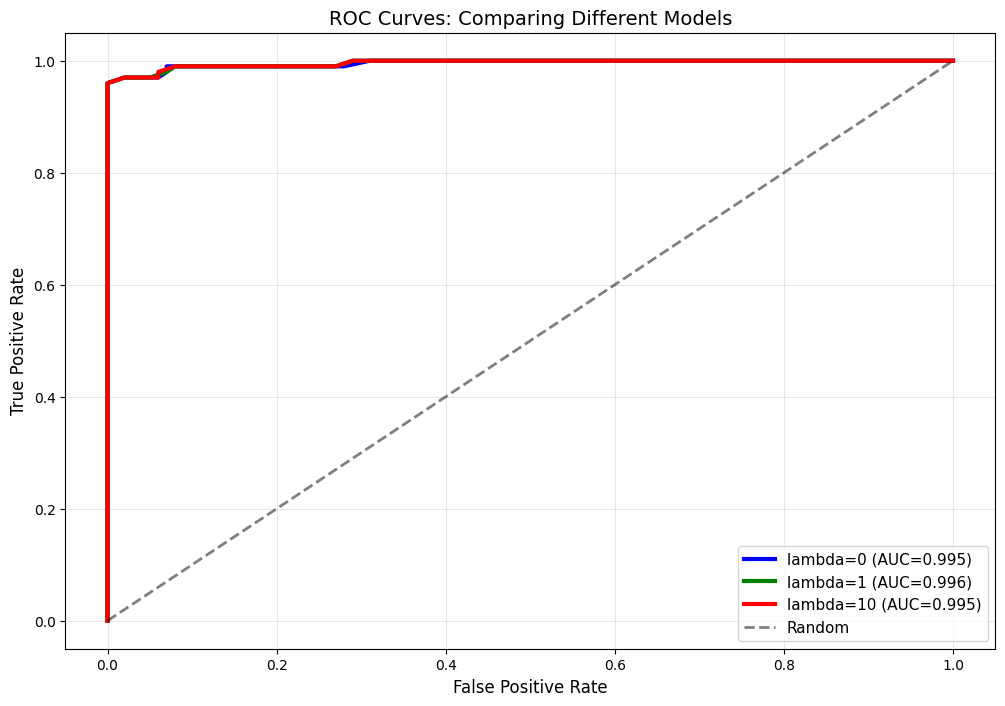


Model Comparison Summary

  Lambda |      AUC |       Interpretation
---------------------------------------------
       0 |   0.9953 |            Excellent
       1 |   0.9955 |            Excellent
      10 |   0.9955 |            Excellent

-> Best model: lambda=1 (AUC=0.9955)


In [40]:
# ============================================================
# COMPARING MULTIPLE MODELS VIA ROC CURVES
# ============================================================
# One of the BEST uses of ROC curves: comparing different models!
#
# WHY COMPARE USING ROC?
# - AUC gives a single number for comparison
# - You can visually see which model is better at ALL thresholds
# - The curve that's "more to the top-left" is better
#
# WHAT WE'LL DO:
# 1. Train 3 models with different regularization (lambda = 0, 1, 10)
# 2. Compute ROC curve for each model
# 3. Plot all curves on the same graph
# 4. Compare AUC scores
#
# ASCII Diagram - Comparing models:
#
#   TPR
#     ^
#   1 |     Model A (best!)
#     |   ......
#     |  .      .  Model B
#     | .    -----.
#     |.   --      .  Model C
#     |  --    ------.
#     | -   ---
#     +----------------> FPR
#
# The model whose curve is highest/leftmost wins!
# ============================================================

print("\n" + "=" * 60)
print("Comparing Multiple Models via ROC")
print("=" * 60)

# ============================================================
# STEP 1: TRAIN 3 MODELS WITH DIFFERENT REGULARIZATION
# ============================================================
# We'll use different lambda values:
# - lambda = 0:  No regularization (might overfit)
# - lambda = 1:  Medium regularization
# - lambda = 10: Heavy regularization (might underfit)
# ============================================================

lambdas = [0, 1, 10]
models = {}  # Dictionary to store each model's results

for lambda_reg in lambdas:
    print(f"\nTraining model with lambda={lambda_reg}...")

    # Initialize theta with small random values
    theta_init = np.random.randn(3, 1) * 0.01

    # Train using regularized gradient descent
    theta, _ = gradient_descent_regularized(
        X_roc_b, y_roc, theta_init,
        learning_rate=0.1, n_iterations=1000,
        lambda_reg=lambda_reg, verbose=False
    )

    # Get probability predictions
    y_prob = sigmoid(X_roc_b.dot(theta))

    # Compute ROC curve for this model
    fpr_model, tpr_model, thresh_model = compute_roc_curve(y_roc, y_prob)

    # Compute AUC for this model
    auc_model = compute_auc(fpr_model, tpr_model)

    # Store everything in our dictionary
    models[lambda_reg] = {
        'fpr': fpr_model,
        'tpr': tpr_model,
        'auc': auc_model,
        'theta': theta
    }

    print(f"  AUC = {auc_model:.4f}")

# ============================================================
# STEP 2: PLOT ALL ROC CURVES TOGETHER
# ============================================================
# This lets us visually compare the models
# ============================================================

plt.figure(figsize=(12, 8))

# Use different colors for each model
colors = ['blue', 'green', 'red']

for (lambda_reg, color) in zip(lambdas, colors):
    # Get this model's data
    fpr_m = models[lambda_reg]['fpr']
    tpr_m = models[lambda_reg]['tpr']
    auc_m = models[lambda_reg]['auc']

    # Create label with lambda and AUC
    label = f'lambda={lambda_reg} (AUC={auc_m:.3f})'

    # Plot the ROC curve
    plt.plot(fpr_m, tpr_m, linewidth=3, color=color, label=label)

# Plot the diagonal (random classifier baseline)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random', alpha=0.5)

# Labels and formatting
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: Comparing Different Models', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='lower right')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.show()

# ============================================================
# STEP 3: PRINT COMPARISON SUMMARY
# ============================================================
print("\n" + "=" * 60)
print("Model Comparison Summary")
print("=" * 60)
print(f"\n{'Lambda':>8} | {'AUC':>8} | {'Interpretation':>20}")
print("-" * 45)

for lambda_reg in lambdas:
    auc = models[lambda_reg]['auc']

    # Interpret the AUC score
    if auc >= 0.9:
        interp = "Excellent"
    elif auc >= 0.8:
        interp = "Very Good"
    elif auc >= 0.7:
        interp = "Good"
    else:
        interp = "Mediocre"

    print(f"{lambda_reg:>8} | {auc:>8.4f} | {interp:>20}")

# Find the best model (highest AUC)
best_lambda = max(models.keys(), key=lambda x: models[x]['auc'])
print(f"\n-> Best model: lambda={best_lambda} (AUC={models[best_lambda]['auc']:.4f})")

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. ROC curves let you compare models visually
#
# 2. The model with the highest AUC is generally best
#
# 3. A curve that "dominates" another (always above it)
#    is better at ALL thresholds
#
# 4. If curves cross, one model might be better at some
#    thresholds and worse at others
#
# 5. Regularization affects model performance:
#    - Too little (lambda=0) might overfit
#    - Too much (lambda=10) might underfit
#    - Just right gives best AUC!
# ============================================================


In [41]:
# ============================================================
# CHOOSING OPTIMAL THRESHOLD FOR DIFFERENT USE CASES
# ============================================================
# The default threshold of 0.5 is NOT always the best choice!
#
# Different applications need different thresholds:
#
# USE CASE 1: CANCER SCREENING
# - Priority: DON'T MISS any cancer (catch all positives!)
# - Accept: Some false alarms (patients get extra tests)
# - Strategy: MAXIMIZE RECALL (even if precision drops)
# - Threshold: LOW (like 0.2 or 0.3)
#
# USE CASE 2: SPAM FILTER
# - Priority: DON'T put important emails in spam!
# - Accept: Some spam gets through
# - Strategy: MAXIMIZE PRECISION (few false positives)
# - Threshold: HIGH (like 0.7 or 0.8)
#
# USE CASE 3: BALANCED
# - Priority: Good balance of both
# - Strategy: MAXIMIZE F1 SCORE (harmonic mean of precision/recall)
# - Threshold: Usually around 0.5
#
# ASCII Diagram - Same model, different operating points:
#
#   TPR
#     ^
#   1 |    * Cancer (high recall)
#     |   .
#     |  .
#     | .  * Balanced (best F1)
#     |.
#     |   * Spam filter (high precision)
#     +----------------> FPR
#       Low           High
#
# ALL THREE POINTS ARE ON THE SAME ROC CURVE!
# We just CHOOSE where to operate.
# ============================================================

print("\n" + "=" * 60)
print("Choosing Optimal Threshold for Different Use Cases")
print("=" * 60)

# ============================================================
# STEP 1: GET PREDICTIONS FROM BEST MODEL
# ============================================================
# We use the best model from our previous comparison
# ============================================================

best_model_theta = models[best_lambda]['theta']
y_probs_best = sigmoid(X_roc_b.dot(best_model_theta))


# ============================================================
# FUNCTION 1: OPTIMAL THRESHOLD FOR CANCER SCREENING
# ============================================================
# Goal: Maximize recall (catch all cancer cases!)
# Constraint: Recall must be >= 95%
# ============================================================

def find_optimal_threshold_cancer(y_true, y_probs):
    """
    For cancer screening: Maximize recall while keeping precision reasonable
    Strategy: Find threshold where recall >= 95%

    Why 95%? Missing 5% of cancers might be acceptable,
    but missing more is too risky!
    """
    thresholds = np.linspace(0, 1, 100)

    best_threshold = 0.5
    best_recall = 0

    for thresh in thresholds:
        # Compute metrics at this threshold
        TPR, FPR, TP, FP, TN, FN = compute_rates(y_true, y_probs, thresh)
        recall = TPR  # TPR = Recall = TP/(TP+FN)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # We want recall >= 0.95 with highest precision
        if recall >= 0.95:
            if recall > best_recall or (recall == best_recall and precision > 0):
                best_recall = recall
                best_threshold = thresh

    return best_threshold


# ============================================================
# FUNCTION 2: OPTIMAL THRESHOLD FOR SPAM FILTERING
# ============================================================
# Goal: Maximize precision (don't lose important emails!)
# Constraint: Precision must be >= 95%
# ============================================================

def find_optimal_threshold_spam(y_true, y_probs):
    """
    For spam filtering: Maximize precision while keeping recall reasonable
    Strategy: Find threshold where precision >= 95%

    Why 95%? We really don't want to put real emails in spam!
    Better to let some spam through than lose important messages.
    """
    thresholds = np.linspace(0, 1, 100)

    best_threshold = 0.5
    best_precision = 0

    for thresh in thresholds:
        # Compute metrics at this threshold
        TPR, FPR, TP, FP, TN, FN = compute_rates(y_true, y_probs, thresh)
        recall = TPR
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # We want precision >= 0.95 with highest recall
        if precision >= 0.95:
            if precision > best_precision or (precision == best_precision and recall > 0):
                best_precision = precision
                best_threshold = thresh

    return best_threshold


# ============================================================
# FUNCTION 3: OPTIMAL THRESHOLD FOR BALANCED PERFORMANCE
# ============================================================
# Goal: Best overall performance
# Strategy: Maximize F1 score
#
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
#
# F1 is the HARMONIC MEAN of precision and recall
# It's high only when BOTH precision AND recall are high!
# ============================================================

def find_optimal_threshold_balanced(y_true, y_probs):
    """
    Balanced use case: Maximize F1 score

    F1 = 2 * (P * R) / (P + R)

    F1 is good when you care equally about:
    - Not missing positives (recall)
    - Not making false alarms (precision)
    """
    thresholds = np.linspace(0, 1, 100)

    best_threshold = 0.5
    best_f1 = 0

    for thresh in thresholds:
        # Compute metrics at this threshold
        TPR, FPR, TP, FP, TN, FN = compute_rates(y_true, y_probs, thresh)
        recall = TPR
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # Compute F1 score (harmonic mean)
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = thresh

    return best_threshold


# ============================================================
# STEP 2: FIND OPTIMAL THRESHOLDS FOR EACH USE CASE
# ============================================================

thresh_cancer = find_optimal_threshold_cancer(y_roc, y_probs_best)
thresh_spam = find_optimal_threshold_spam(y_roc, y_probs_best)
thresh_balanced = find_optimal_threshold_balanced(y_roc, y_probs_best)

# ============================================================
# STEP 3: COMPARE RESULTS
# ============================================================
print("\nOptimal Thresholds for Different Use Cases:")
print(f"\n{'Use Case':>20} | {'Threshold':>10} | {'Recall':>8} | {'Precision':>10} | {'F1':>8}")
print("-" * 70)

for use_case, thresh in [('Cancer Screening', thresh_cancer),
                          ('Spam Filter', thresh_spam),
                          ('Balanced', thresh_balanced)]:
    # Compute all metrics at this threshold
    TPR, FPR, TP, FP, TN, FN = compute_rates(y_roc, y_probs_best, thresh)
    recall = TPR
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"{use_case:>20} | {thresh:>10.3f} | {recall:>8.3f} | {precision:>10.3f} | {f1:>8.3f}")

# ============================================================
# SUMMARY
# ============================================================
print("\n" + "=" * 60)
print("Key Insights:")
print("=" * 60)
print(f"* Cancer screening: Low threshold ({thresh_cancer:.3f}) -> High recall")
print(f"* Spam filter: High threshold ({thresh_spam:.3f}) -> High precision")
print(f"* Balanced: Middle threshold ({thresh_balanced:.3f}) -> Best F1")
print("\nSAME MODEL, DIFFERENT THRESHOLDS FOR DIFFERENT NEEDS!")

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. The default threshold (0.5) is NOT always optimal!
#
# 2. Choose threshold based on your APPLICATION:
#    - Medical diagnosis: Prioritize recall (don't miss cases)
#    - Spam filter: Prioritize precision (don't lose emails)
#    - General: Maximize F1 for balance
#
# 3. The ROC curve shows ALL possible operating points
#    - You pick the point that matches your needs
#
# 4. There's always a tradeoff:
#    - Higher recall = Lower precision (usually)
#    - Higher precision = Lower recall (usually)
#
# 5. This is why ROC/AUC is powerful:
#    - The model is the same
#    - Only the threshold changes
#    - You can adapt to ANY use case!
# ============================================================



Choosing Optimal Threshold for Different Use Cases

Optimal Thresholds for Different Use Cases:

            Use Case |  Threshold |   Recall |  Precision |       F1
----------------------------------------------------------------------
    Cancer Screening |      0.131 |    1.000 |      0.775 |    0.873
         Spam Filter |      0.990 |    0.150 |      1.000 |    0.261
            Balanced |      0.586 |    0.960 |      1.000 |    0.980

Key Insights:
* Cancer screening: Low threshold (0.131) -> High recall
* Spam filter: High threshold (0.990) -> High precision
* Balanced: Middle threshold (0.586) -> Best F1

SAME MODEL, DIFFERENT THRESHOLDS FOR DIFFERENT NEEDS!
